# Model Flow

# Import Libraries

In [13]:
import pandas as pd
import pathlib
import os
import numpy as np
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [14]:
curr_dir = pathlib.Path.cwd()
home_dir = curr_dir.parent
raw_path = home_dir.as_posix() 
insights_plot_path = raw_path  + r'/src/visualization/insights_plots/'

In [15]:
def merge_csv_files(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    dfs = []
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dfs.append(df)
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df 
folder_path = raw_path + r'\data\raw'
merged_df = merge_csv_files(folder_path)
merged_df

,Unnamed: 0,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,carbon_emission,overhead_bin,layover,details,round_trip_duration
0,0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,6:47 AM,10:15 AM,Mar 28,Mar 28,Carbon emissions estimate: 293 kilograms. -18%...,This price for this flight doesn't include ove...,NaN,From 211 US dollars round trip total.This pric...,89
1,1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,7:30 AM,10:48 AM,Mar 28,Mar 28,Carbon emissions estimate: 272 kilograms. -24%...,$297,NaN,From 297 US dollars round trip total. Nonstop ...,89
2,2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,5:15 AM,8:30 AM,Mar 28,Mar 28,Carbon emissions estimate: 422 kilograms. +18%...,This price for this flight doesn't include ove...,NaN,From 298 US dollars round trip total.This pric...,89
3,3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00 PM,3:24 PM,Mar 28,Mar 28,Carbon emissions estimate: 427 kilograms. +19%...,This price for this flight doesn't include ove...,NaN,From 302 US dollars round trip total.This pric...,89
4,4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,4:29 PM,5:00 PM,Mar 28,Mar 28,Carbon emissions estimate: 338 kilograms. -6% ...,$269,Layover (1 of 1) is a 19 hr 30 min overnight l...,From 269 US dollars round trip total. 1 stop f...,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140522,40,2024-04-06,Alaska,LAX,EWR,Nonstop,259.0,10:20 AM,6:59 PM,Jul 4,Jul 5,Carbon emissions estimate: 300 kilograms. -15%...,$259,NaN,From 259 US dollars. Nonstop flight with Alask...,0
140523,41,2024-04-06,JetBlue,LAX,EWR,Nonstop,259.0,11:20 AM,7:49 PM,Jul 4,Jul 5,Carbon emissions estimate: 370 kilograms. Aver...,This price for this flight doesn't include ove...,NaN,From 259 US dollars.This price does not includ...,0
140524,42,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,6:00 AM,2:35 PM,Jul 4,Jul 5,Carbon emissions estimate: 298 kilograms. -15%...,$274,NaN,From 274 US dollars. Nonstop flight with Delta...,0
140525,43,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,9:20 AM,6:15 PM,Jul 4,Jul 5,Carbon emissions estimate: 298 kilograms. -15%...,$274,NaN,From 274 US dollars. Nonstop flight with Delta...,0


In [16]:
source_df = merged_df.reset_index()

In [17]:
source_df.columns

Index(['index', 'Unnamed: 0', 'Report_Run_Time', 'carrier', 'from_loc',
       'to_loc', 'stop', 'price', 'from_timestamp', 'to_timestamp',
       'from_date', 'to_date', 'carbon_emission', 'overhead_bin', 'layover',
       'details', 'round_trip_duration'],
      dtype='object')

In [18]:
df = source_df[['Report_Run_Time', 'carrier', 'from_loc',
       'to_loc', 'stop', 'price', 'from_timestamp', 'to_timestamp',
       'from_date', 'to_date', 'carbon_emission', 'overhead_bin', 'layover',
       'details', 'round_trip_duration']]

In [19]:
df.head(2)

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,carbon_emission,overhead_bin,layover,details,round_trip_duration
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,6:47 AM,10:15 AM,Mar 28,Mar 28,Carbon emissions estimate: 293 kilograms. -18%...,This price for this flight doesn't include ove...,NaN,From 211 US dollars round trip total.This pric...,89
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,7:30 AM,10:48 AM,Mar 28,Mar 28,Carbon emissions estimate: 272 kilograms. -24%...,$297,NaN,From 297 US dollars round trip total. Nonstop ...,89


# Understanding Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140527 entries, 0 to 140526
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Report_Run_Time      140527 non-null  object 
 1   carrier              140527 non-null  object 
 2   from_loc             140527 non-null  object 
 3   to_loc               140527 non-null  object 
 4   stop                 140527 non-null  object 
 5   price                140522 non-null  float64
 6   from_timestamp       140527 non-null  object 
 7   to_timestamp         140527 non-null  object 
 8   from_date            140527 non-null  object 
 9   to_date              140527 non-null  object 
 10  carbon_emission      140527 non-null  object 
 11  overhead_bin         140527 non-null  object 
 12  layover              19089 non-null   object 
 13  details              140527 non-null  object 
 14  round_trip_duration  140527 non-null  int64  
dtypes: float64(1), in

In [21]:
df.isnull().sum()

Report_Run_Time             0
carrier                     0
from_loc                    0
to_loc                      0
stop                        0
price                       5
from_timestamp              0
to_timestamp                0
from_date                   0
to_date                     0
carbon_emission             0
overhead_bin                0
layover                121438
details                     0
round_trip_duration         0
dtype: int64

In [22]:
### Observations
#### There is very few record where price is null

In [23]:
df[df['price'].isnull()]

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,carbon_emission,overhead_bin,layover,details,round_trip_duration
58894,2024-03-22,Southwest,LAX,LGA,1 stop,NaN,1:25 PM,11:15 PM,Jun 7,Jun 7,Carbon emissions estimate: 272 kilograms. -23%...,Price unavailable,Layover (1 of 1) is a 45 min layover at Chicag...,Total price is unavailable. 1 stop flight with...,21
68839,2024-03-24,Southwest,LAX,LGA,1 stop,NaN,9:40 AM,7:25 PM,Mar 28,Mar 28,Carbon emissions estimate: 320 kilograms. -10%...,Price unavailable,Layover (1 of 1) is a 50 min layover at Denver...,Total price is unavailable. 1 stop flight with...,56
74219,2024-03-25,Southwest,LAX,LGA,1 stop,NaN,8:15 AM,5:55 PM,May 11,May 11,Carbon emissions estimate: 338 kilograms. Aver...,Price unavailable,Layover (1 of 1) is a 40 min layover at Kansas...,Total price is unavailable. 1 stop flight with...,16
79315,2024-03-26,Southwest,LAX,LGA,1 stop,NaN,6:35 AM,4:25 PM,Jun 23,Jun 23,Carbon emissions estimate: 287 kilograms. -18%...,Price unavailable,Layover (1 of 1) is a 50 min layover at St. Lo...,Total price is unavailable. 1 stop flight with...,22
132544,2024-04-05,Southwest,LAX,LGA,1 stop,NaN,8:15 AM,5:55 PM,May 4,May 4,Carbon emissions estimate: 338 kilograms. Aver...,Price unavailable,Layover (1 of 1) is a 40 min layover at Kansas...,Total price is unavailable. 1 stop flight with...,70


### Observation
- There is 1 record where price is null

In [24]:
df = df[~df['price'].isnull()]

In [25]:
df.isnull().sum()

Report_Run_Time             0
carrier                     0
from_loc                    0
to_loc                      0
stop                        0
price                       0
from_timestamp              0
to_timestamp                0
from_date                   0
to_date                     0
carbon_emission             0
overhead_bin                0
layover                121438
details                     0
round_trip_duration         0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,140522.0,354.606062,174.123533,46.0,229.0,329.0,452.0,4074.0
round_trip_duration,140522.0,24.904947,29.696395,0.0,0.0,9.0,49.0,90.0


In [27]:
df[df.duplicated()].shape

(43, 15)

In [28]:
df.columns

Index(['Report_Run_Time', 'carrier', 'from_loc', 'to_loc', 'stop', 'price',
       'from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'carbon_emission', 'overhead_bin', 'layover', 'details',
       'round_trip_duration'],
      dtype='object')

In [29]:
df[(df['carrier']=='Spirit') & (df['stop']=='2 stops') & (df['price']== 236) & (df['from_date']== 'Mar 15')]['layover'].unique()

array(['Layover (1 of 2) is a 39 min layover at Detroit Metropolitan Wayne County Airport in Detroit. Layover (2 of 2) is a 7 hr 48 min overnight layover at Harry Reid International Airport in Las Vegas.',
       'Layover (1 of 2) is a 1 hr 35 min layover at Detroit Metropolitan Wayne County Airport in Detroit. Layover (2 of 2) is a 6 hr 50 min overnight layover at Harry Reid International Airport in Las Vegas.'],
      dtype=object)

In [30]:
df = df.drop_duplicates(keep='first')

### Observation

- Dropping duplicates rows
- Looks like there are records that are duplicate except distinct layover
- If different layover options are ignored later in the analysis then more duplicate rows will need to be removed

In [31]:
df.shape

(140479, 15)

# EDA

## EDA - Univariate Analysis

In [32]:
pd.DataFrame(df.columns)

,0
0,Report_Run_Time
1,carrier
2,from_loc
3,to_loc
4,stop
5,price
6,from_timestamp
7,to_timestamp
8,from_date
9,to_date


## 0.Report Run Time

In [33]:
df['Report_Run_Time'] = pd.to_datetime(df['Report_Run_Time'])
df['Report_Run_Time'] = df['Report_Run_Time'].dt.date
df['Report_Run_Time'].value_counts().sort_index()

Report_Run_Time
2024-03-10    5136
2024-03-11    5156
2024-03-12    5161
2024-03-13    5113
2024-03-14    5085
2024-03-15    5129
2024-03-16    5192
2024-03-17    5241
2024-03-18    5273
2024-03-19    5145
2024-03-21    5088
2024-03-22    5112
2024-03-23    5201
2024-03-24    5189
2024-03-25    5205
2024-03-26    5190
2024-03-27    5300
2024-03-28    5406
2024-03-29    5336
2024-03-30    5259
2024-03-31    5232
2024-04-01    5165
2024-04-02    5398
2024-04-03    5363
2024-04-04    5206
2024-04-05    5118
2024-04-06    5080
Name: count, dtype: int64

<Axes: xlabel='Report_Run_Time'>

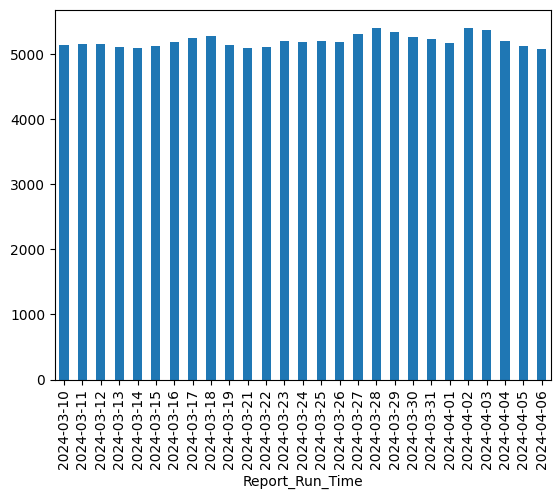

In [34]:
df['Report_Run_Time'].value_counts().sort_index().plot(kind='bar',)

## 1.carrier column

In [35]:
df.carrier.value_counts()

carrier
JetBlue                                                                                                                                                36156
United                                                                                                                                                 28364
American                                                                                                                                               26825
Delta                                                                                                                                                  25562
Spirit                                                                                                                                                  9566
Alaska                                                                                                                                                  8255
Separate tickets booked togetherThis trip includes

### Observation 

- There are trips which include traveling through multiple airlines. 
- This usually involves purchasing ticket from 3rd party agencies. 
- As there are good enough options available from 1st party carriers, these data points can be excluded from the model
- However, when analyzed if there are reason to keep these data points, it looks like these carriers provide better price point to customers.
- As, one of the objective of this model is to share flight options with cheaper options, I will keep these data point and bucket them as third party 

In [36]:
third_party_df = df[df['carrier'].str.contains('Separate tickets')]
third_party_df.head(2)

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,carbon_emission,overhead_bin,layover,details,round_trip_duration
5,2024-03-10,Separate tickets booked togetherThis trip incl...,EWR,LAX,1 stop,270.0,7:47 AM,12:54 PM,Mar 28,Mar 28,Carbon emissions estimate: 295 kilograms. -18%...,This price for this flight doesn't include ove...,Layover (1 of 1) is a 1 hr 3 min layover at Ha...,From 270 US dollars round trip total.This pric...,89
6,2024-03-10,Separate tickets booked togetherThis trip incl...,LGA,LAX,2 stops,285.0,10:50 PM,11:03 AM,Mar 28,Mar 28,Carbon emissions estimate: 317 kilograms. -12%...,This price for this flight doesn't include ove...,Layover (1 of 2) is a 4 hr 23 min overnight la...,From 285 US dollars round trip total.This pric...,89


In [37]:
df.loc[df['carrier'].str.contains('Separate tickets'), 'carrier'] = 'Third Party'


In [38]:
df.carrier.value_counts()

carrier
JetBlue                 36156
United                  28364
American                26825
Delta                   25562
Spirit                   9566
Alaska                   8255
Third Party              4102
Frontier                 1389
Sun Country Airlines      260
Name: count, dtype: int64

<Axes: xlabel='carrier'>

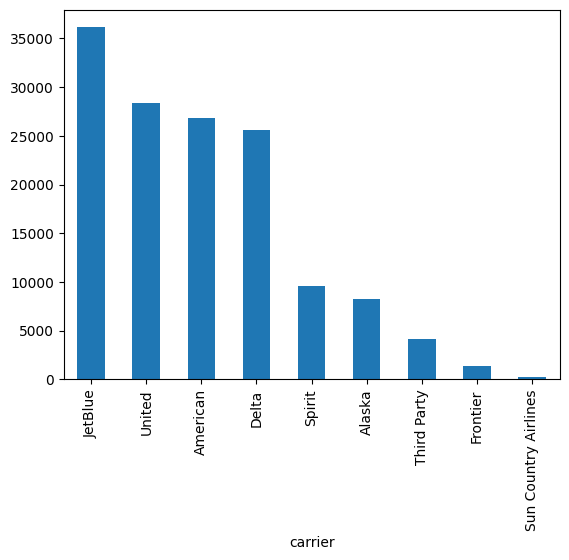

In [39]:
df.carrier.value_counts()
df['carrier'].value_counts().plot(kind='bar',)

### Observation
- JetBlue seems to have most number of trip options (including one way and round trip)
- United and American and Delta seems to be 2nd spot
- Spirit, Alaska seems to be 3rd most number of trip options and  rest of the carriers have less than thousand

## 2.From Airport

In [40]:
df.from_loc.value_counts()

from_loc
LAX    69261
JFK    38789
EWR    27506
LGA     4923
Name: count, dtype: int64

## 3.To Airport

In [41]:
df.to_loc.value_counts()

to_loc
LAX    71218
JFK    35543
EWR    27402
LGA     6316
Name: count, dtype: int64

### 3.1 Airport Route(New Column)

In [42]:
df['Airport_Route'] = df['from_loc'] + " - " + df['to_loc']

In [43]:
df.from_loc.unique()

array(['EWR', 'LGA', 'JFK', 'LAX'], dtype=object)

In [44]:
df.to_loc.unique()

array(['LAX', 'EWR', 'LGA', 'JFK'], dtype=object)

### 3.2 City Route (New Column)

In [45]:
df.loc[df.from_loc == 'LAX','From_City'] = 'Los Angeles'
df.loc[df.from_loc == 'LGA','From_City'] = 'New York City'
df.loc[df.from_loc == 'EWR','From_City'] = 'New York City'
df.loc[df.from_loc == 'JFK','From_City'] = 'New York City'

df.loc[df.to_loc == 'LAX','To_City'] = 'Los Angeles'
df.loc[df.to_loc == 'LGA','To_City'] = 'New York City'
df.loc[df.to_loc == 'EWR','To_City'] = 'New York City'
df.loc[df.to_loc == 'JFK','To_City'] = 'New York City'

In [46]:
df['City_Route'] = df['From_City'] + " - " + df['To_City']

In [47]:
df.City_Route.value_counts()

City_Route
New York City - Los Angeles    71218
Los Angeles - New York City    69261
Name: count, dtype: int64

## 4.Stop

<Axes: xlabel='stop'>

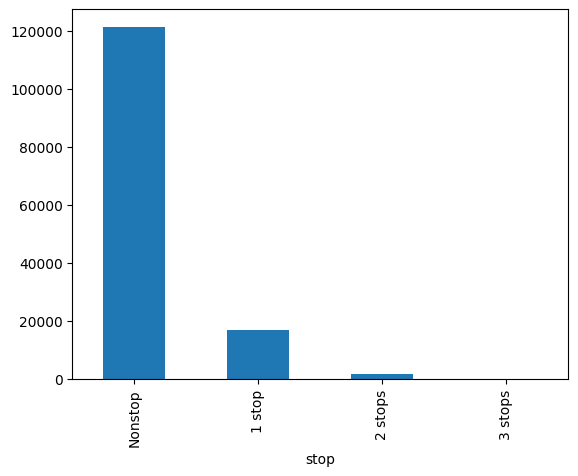

In [48]:
df.stop.value_counts().plot(kind='bar')

### Observation

- More flight options are non stop as compared to around other flight options

## 5.Price

### Price

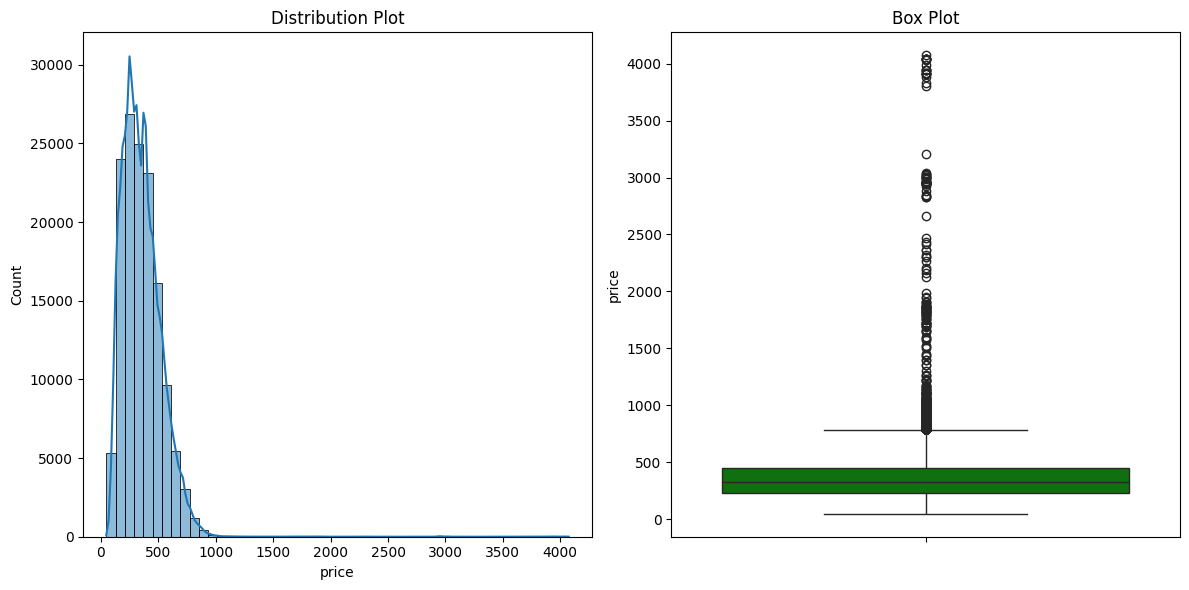

In [49]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution plot on the first subplot
sns.histplot(df['price'], kde=True, bins=50, ax=axes[0])
axes[0].set_title('Distribution Plot')

# Plot box plot on the second subplot
sns.boxplot(df['price'], ax=axes[1], color='green')
axes[1].set_title('Box Plot')

plt.tight_layout()
plt.show()


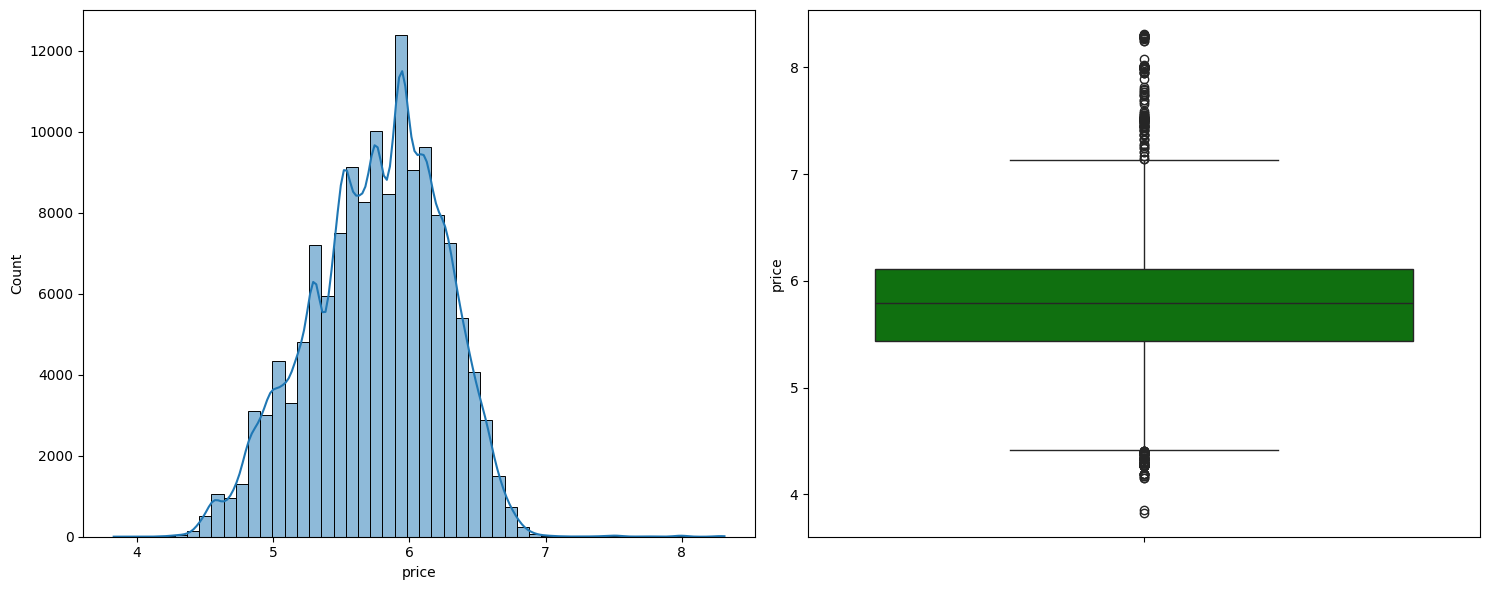

In [50]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.histplot(np.log(df['price']), kde=True, bins=50)

plt.subplot(1,2,2)
sns.boxplot(np.log(df['price']), color='green')

plt.tight_layout()
plt.show()

In [51]:
skewness = np.log(df['price']).skew()
kurtosis = np.log(df['price']).kurt()

print(skewness,kurtosis)

-0.25150314728705875 -0.1743497961186078


In [52]:
df.price.mean()

354.6354971205661

In [53]:
df.price.median()

329.0

In [54]:
df.price.mode()

0    204.0
Name: price, dtype: float64

### Observation
- Price distribution seems to be right tail. Using log transformation makes the distribution even tail. 

## 6.From timestamp

In [55]:
df['from_timestamp'] = pd.to_datetime(df['from_timestamp']).dt.time
df['from_timestamp']

C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\2401876065.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['from_timestamp'] = pd.to_datetime(df['from_timestamp']).dt.time


0         06:47:00
1         07:30:00
2         05:15:00
3         12:00:00
4         16:29:00
            ...   
140522    10:20:00
140523    11:20:00
140524    06:00:00
140525    09:20:00
140526    16:00:00
Name: from_timestamp, Length: 140479, dtype: object

In [56]:
df['from_hour'] = df['from_timestamp'].apply(lambda x:x.hour)

<Axes: xlabel='from_hour'>

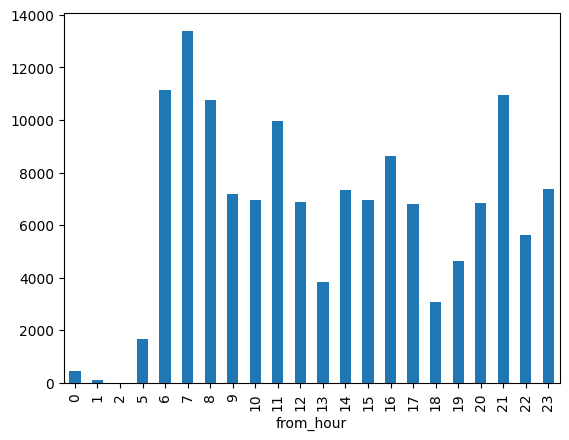

In [57]:
df['from_hour'].value_counts().sort_index().plot(kind='bar')

In [58]:
df.loc[(df['from_hour'] >= 0) & (df['from_hour'] < 3),'from_hour_segment'] = '1. 12 AM - 3 AM'
df.loc[(df['from_hour'] >= 3) & (df['from_hour'] < 6),'from_hour_segment'] = '2. 3 AM - 6 AM'
df.loc[(df['from_hour'] >= 6) & (df['from_hour'] < 9),'from_hour_segment'] = '3. 6 AM - 9 AM'
df.loc[(df['from_hour'] >= 9) & (df['from_hour'] < 12),'from_hour_segment'] = '4. 9 AM - 12 PM'
df.loc[(df['from_hour'] >= 12) & (df['from_hour'] < 15),'from_hour_segment'] = '5. 12 PM - 3 PM'
df.loc[(df['from_hour'] >= 15) & (df['from_hour'] < 18),'from_hour_segment'] = '6. 3 PM - 6 PM'
df.loc[(df['from_hour'] >= 18) & (df['from_hour'] < 21),'from_hour_segment'] = '7. 6 PM - 9 PM'
df.loc[(df['from_hour'] >= 21) & (df['from_hour'] < 24),'from_hour_segment'] = '8. 9 PM - 12 AM'

<Axes: xlabel='from_hour_segment'>

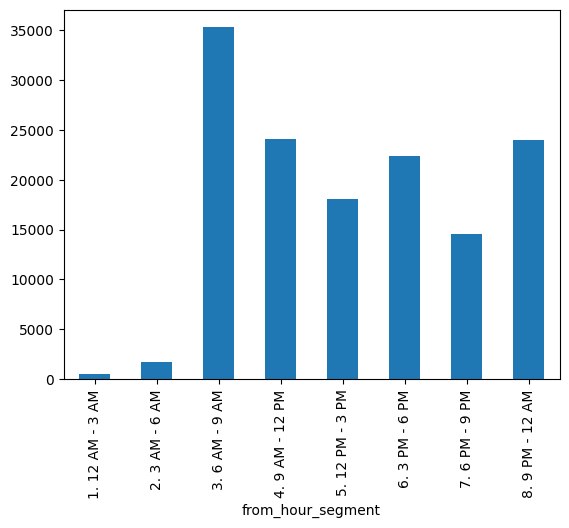

In [59]:
df['from_hour_segment'].value_counts().sort_index().plot(kind='bar')

### Observation
- Most of the flight options are available b/w 7 and 8 am. 
- Next most options are available b/w 6 am and 9 pm     
  

  

- If we group the flight start time then 6 am - 9 am seems to be most frequent time the carriers fly
- 9 pm - 12 am and 9 AM - 12 PM seems to be next most frequent 

## 7.To timestamp

In [60]:
df['to_timestamp'] = pd.to_datetime(df['to_timestamp']).dt.time
df['to_timestamp']

C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\730532032.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['to_timestamp'] = pd.to_datetime(df['to_timestamp']).dt.time


0         10:15:00
1         10:48:00
2         08:30:00
3         15:24:00
4         17:00:00
            ...   
140522    18:59:00
140523    19:49:00
140524    14:35:00
140525    18:15:00
140526    00:37:00
Name: to_timestamp, Length: 140479, dtype: object

In [61]:
df['to_hour'] = df['to_timestamp'].apply(lambda x:x.hour)

<Axes: xlabel='to_hour'>

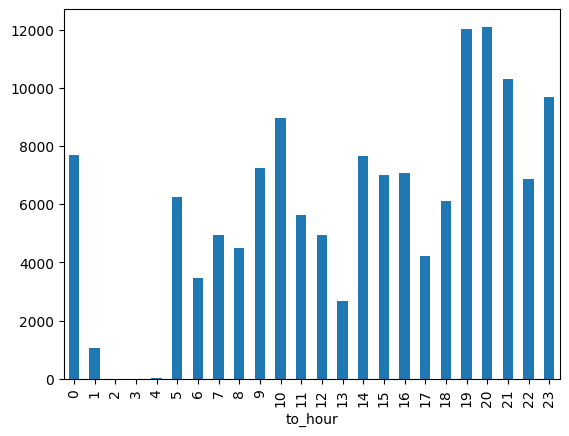

In [62]:
df['to_hour'].value_counts().sort_index().plot(kind='bar')

In [63]:
df.loc[(df['to_hour'] >= 0) & (df['to_hour'] < 3),'to_hour_segment'] = '1. 12 AM - 3 AM'
df.loc[(df['to_hour'] >= 3) & (df['to_hour'] < 6),'to_hour_segment'] = '2. 3 AM - 6 AM'
df.loc[(df['to_hour'] >= 6) & (df['to_hour'] < 9),'to_hour_segment'] = '3. 6 AM - 9 AM'
df.loc[(df['to_hour'] >= 9) & (df['to_hour'] < 12),'to_hour_segment'] = '4. 9 AM - 12 PM'
df.loc[(df['to_hour'] >= 12) & (df['to_hour'] < 15),'to_hour_segment'] = '5. 12 PM - 3 PM'
df.loc[(df['to_hour'] >= 15) & (df['to_hour'] < 18),'to_hour_segment'] = '6. 3 PM - 6 PM'
df.loc[(df['to_hour'] >= 18) & (df['to_hour'] < 21),'to_hour_segment'] = '7. 6 PM - 9 PM'
df.loc[(df['to_hour'] >= 21) & (df['to_hour'] < 24),'to_hour_segment'] = '8. 9 PM - 12 AM'

<Axes: xlabel='to_hour_segment'>

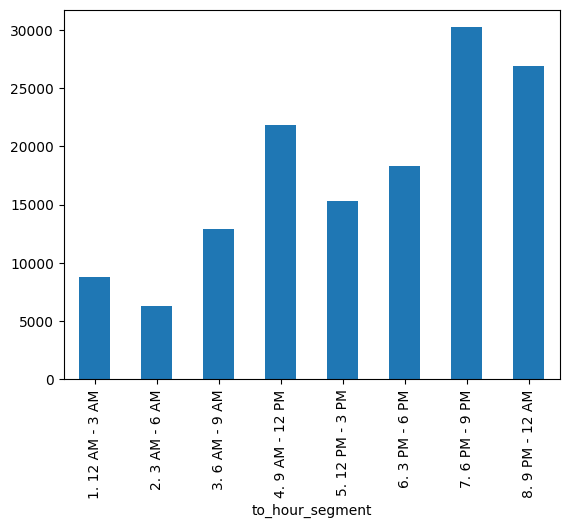

In [64]:
df['to_hour_segment'].value_counts().sort_index().plot(kind='bar')

### Observation
- Most of the flight options are available b/w 7 and 9 pm. 

- There are more flights that reach destination after 6 pm

In [65]:
df[df['layover']=='Layover (1 of 2) is a 1 hr 9 min layover at Harry Reid International Airport in Las Vegas. Layover (2 of 2) is a 12 hr 54 min layover at Phoenix Sky Harbor International Airport in Phoenix.']['details'].values

array(['From 165 US dollars.This price does not include overhead bin access. 2 stops flight with Spirit. Leaves Los Angeles International Airport at 6:45\u202fAM on Monday, April 1 and arrives at Newark Liberty International Airport at 6:47\u202fAM on Tuesday, April 2. Total duration 21 hr 2 min. Layover (1 of 2) is a 1 hr 9 min layover at Harry Reid International Airport in Las Vegas. Layover (2 of 2) is a 12 hr 54 min layover at Phoenix Sky Harbor International Airport in Phoenix. Separate tickets booked together. This trip includes tickets from multiple airlines. Missed connections may be protected by Kiwi.com. Select flight',
       'From 296 US dollars round trip total.This price does not include overhead bin access. 2 stops flight with Spirit. Leaves Los Angeles International Airport at 6:45\u202fAM on Tuesday, April 2 and arrives at Newark Liberty International Airport at 6:47\u202fAM on Wednesday, April 3. Total duration 21 hr 2 min. Layover (1 of 2) is a 1 hr 9 min layover at 

## 8.From date

In [66]:
df['from_date'] = pd.to_datetime(df['from_date'] + ' 2024', format='%b %d %Y')
df['to_date'] = pd.to_datetime(df['to_date'] + ' 2024', format='%b %d %Y')

<Axes: xlabel='from_date'>

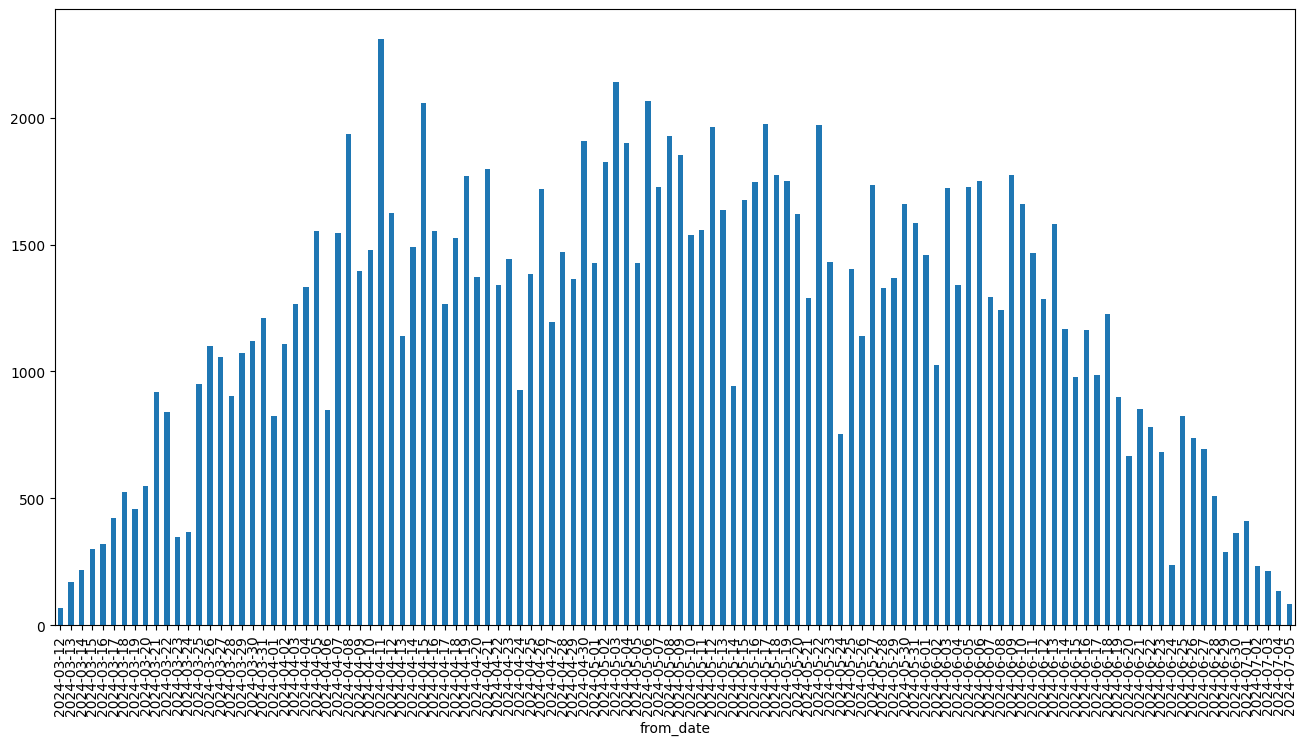

In [67]:
plt.figure(figsize=(16, 8))
(df['from_date'].dt.date).value_counts().sort_index().plot(kind='bar')

### Holiday (New Column)

In [68]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2024-01-01', end='2024-12-31').to_pydatetime()
holiday_df = pd.DataFrame(holidays, columns=['Holiday'])
holiday_df

,Holiday
0,2024-01-01
1,2024-01-15
2,2024-02-19
3,2024-05-27
4,2024-06-19
5,2024-07-04
6,2024-09-02
7,2024-10-14
8,2024-11-11
9,2024-11-28


In [69]:
df.loc[df['from_date'].isin(holiday_df['Holiday']),'Holiday'] = 'Holiday'
df.loc[~df['from_date'].isin(holiday_df['Holiday']),'Holiday'] = 'Not_Holiday'

In [70]:
df['Holiday'].value_counts()

Holiday
Not_Holiday    137711
Holiday          2768
Name: count, dtype: int64

## 9.To Date

<Axes: xlabel='to_date'>

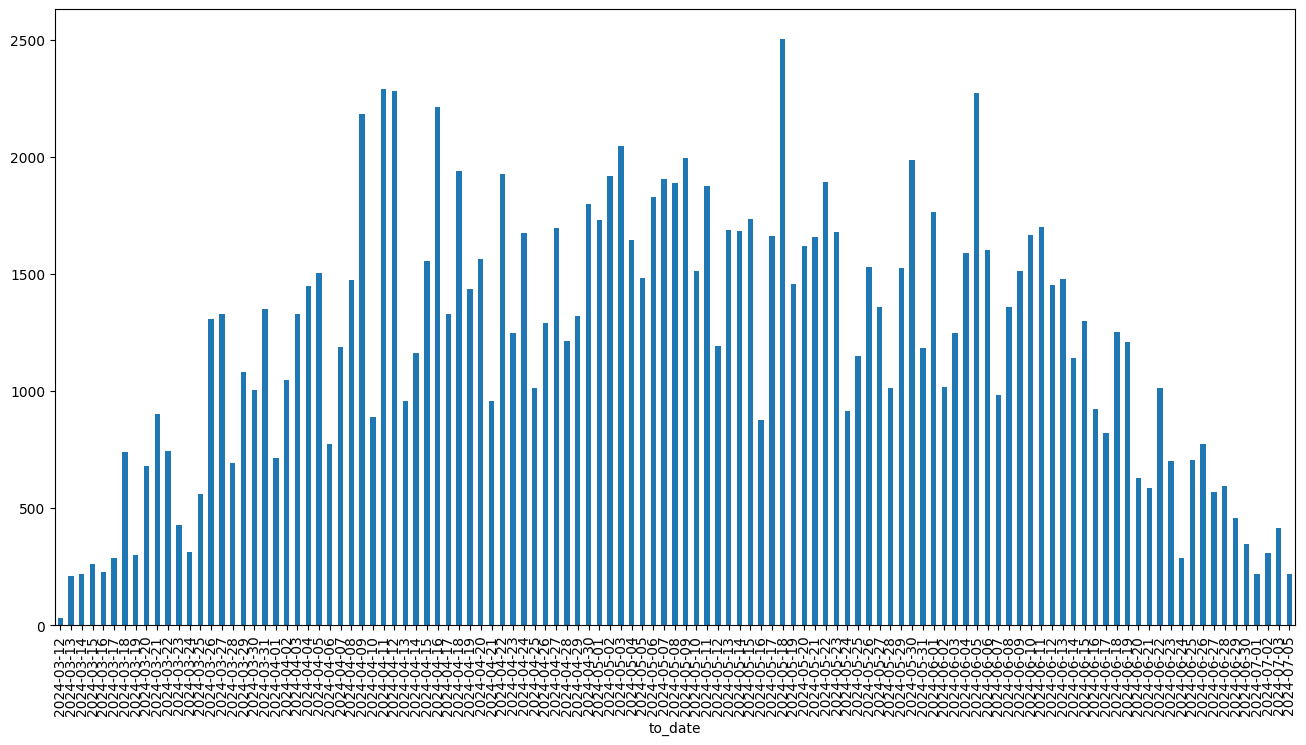

In [71]:
plt.figure(figsize=(16, 8))
(df['to_date'].dt.date).value_counts().sort_index().plot(kind='bar')

### Observation
- Scraping seems to be collecting good amount of data from different days which can help in unbiased analysis b/w flight journey date and price. 

### 9.1 Days to Fly (New Column)

In [72]:
df['Days_to_Fly'] = df['from_date'] - pd.to_datetime(df['Report_Run_Time'])
df['Days_to_Fly'] = df['Days_to_Fly'].dt.days
df.head(2)

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,Airport_Route,From_City,To_City,City_Route,from_hour,from_hour_segment,to_hour,to_hour_segment,Holiday,Days_to_Fly
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,2024-03-28,...,EWR - LAX,New York City,Los Angeles,New York City - Los Angeles,6,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,2024-03-28,...,EWR - LAX,New York City,Los Angeles,New York City - Los Angeles,7,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18


### Observation

- Time to fly from the booking data is b/w 1 and 90 and seems to be random

### 9.2Flight Duration (New Column)

In [73]:
df['from_timestamp_1'] = pd.to_datetime(df['from_date']) + pd.to_timedelta(df['from_timestamp'].astype(str))
df['to_timestamp_1'] = pd.to_datetime(df['to_date']) + pd.to_timedelta(df['to_timestamp'].astype(str))
df.head(2)

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,To_City,City_Route,from_hour,from_hour_segment,to_hour,to_hour_segment,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,2024-03-28,...,Los Angeles,New York City - Los Angeles,6,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 06:47:00,2024-03-28 10:15:00
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,2024-03-28,...,Los Angeles,New York City - Los Angeles,7,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 07:30:00,2024-03-28 10:48:00


In [74]:
df['flight_duration'] = df['to_timestamp_1'] - df['from_timestamp_1']
df.head()

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,City_Route,from_hour,from_hour_segment,to_hour,to_hour_segment,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,2024-03-28,...,New York City - Los Angeles,6,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,2024-03-28,...,New York City - Los Angeles,7,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00
2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,05:15:00,08:30:00,2024-03-28,2024-03-28,...,New York City - Los Angeles,5,2. 3 AM - 6 AM,8,3. 6 AM - 9 AM,Not_Holiday,18,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00
3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00:00,15:24:00,2024-03-28,2024-03-28,...,New York City - Los Angeles,12,5. 12 PM - 3 PM,15,6. 3 PM - 6 PM,Not_Holiday,18,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00
4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,17:00:00,2024-03-28,2024-03-28,...,New York City - Los Angeles,16,6. 3 PM - 6 PM,17,6. 3 PM - 6 PM,Not_Holiday,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00


In [75]:
df.loc[df['flight_duration'].dt.total_seconds() < 0, 'to_timestamp_1'] += pd.to_timedelta('1 day')

In [76]:
df['flight_duration'] = df['to_timestamp_1'] - df['from_timestamp_1']

In [77]:
df[df['flight_duration'].dt.total_seconds() < 0]

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,City_Route,from_hour,from_hour_segment,to_hour,to_hour_segment,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration


In [78]:
df.details.values

array(['From 211 US dollars round trip total.This price does not include overhead bin access. Nonstop flight with Spirit. Leaves Newark Liberty International Airport at 6:47\u202fAM on Thursday, March 28 and arrives at Los Angeles International Airport at 10:15\u202fAM on Thursday, March 28. Total duration 6 hr 28 min.  Select flight',
       'From 297 US dollars round trip total. Nonstop flight with Alaska. Leaves Newark Liberty International Airport at 7:30\u202fAM on Thursday, March 28 and arrives at Los Angeles International Airport at 10:48\u202fAM on Thursday, March 28. Total duration 6 hr 18 min.  Select flight',
       'From 298 US dollars round trip total.This price does not include overhead bin access. Nonstop flight with JetBlue. Leaves Newark Liberty International Airport at 5:15\u202fAM on Thursday, March 28 and arrives at Los Angeles International Airport at 8:30\u202fAM on Thursday, March 28. Total duration 6 hr 15 min.  Select flight',
       ...,
       'From 274 US do

In [79]:
df[['Hours', 'Minutes']] = df['details'].str.extract(r'Total duration (\d+) hr(?: (\d+) min)?')

# Fill NaN values in 'Minutes' column with 0, since some rows might not have minutes information
df['Minutes'] = df['Minutes'].fillna(0).astype(int)

# Display DataFrame


In [80]:
df['Hours'] = pd.to_numeric(df['Hours'])
df['Minutes'] = pd.to_numeric(df['Minutes'])
df

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,from_hour_segment,to_hour,to_hour_segment,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,2024-03-28,...,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,6.0,28
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,2024-03-28,...,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,6.0,18
2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,05:15:00,08:30:00,2024-03-28,2024-03-28,...,2. 3 AM - 6 AM,8,3. 6 AM - 9 AM,Not_Holiday,18,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,6.0,15
3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00:00,15:24:00,2024-03-28,2024-03-28,...,5. 12 PM - 3 PM,15,6. 3 PM - 6 PM,Not_Holiday,18,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,6.0,24
4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,17:00:00,2024-03-28,2024-03-28,...,6. 3 PM - 6 PM,17,6. 3 PM - 6 PM,Not_Holiday,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140522,2024-04-06,Alaska,LAX,EWR,Nonstop,259.0,10:20:00,18:59:00,2024-07-04,2024-07-05,...,4. 9 AM - 12 PM,18,7. 6 PM - 9 PM,Holiday,89,2024-07-04 10:20:00,2024-07-05 18:59:00,1 days 08:39:00,5.0,39
140523,2024-04-06,JetBlue,LAX,EWR,Nonstop,259.0,11:20:00,19:49:00,2024-07-04,2024-07-05,...,4. 9 AM - 12 PM,19,7. 6 PM - 9 PM,Holiday,89,2024-07-04 11:20:00,2024-07-05 19:49:00,1 days 08:29:00,5.0,29
140524,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,06:00:00,14:35:00,2024-07-04,2024-07-05,...,3. 6 AM - 9 AM,14,5. 12 PM - 3 PM,Holiday,89,2024-07-04 06:00:00,2024-07-05 14:35:00,1 days 08:35:00,5.0,35
140525,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,09:20:00,18:15:00,2024-07-04,2024-07-05,...,4. 9 AM - 12 PM,18,7. 6 PM - 9 PM,Holiday,89,2024-07-04 09:20:00,2024-07-05 18:15:00,1 days 08:55:00,5.0,55


### Flight Time

In [81]:
df['Flight_Time'] = df['Hours'] + round(df['Minutes']/60,1)
df

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,to_hour,to_hour_segment,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,2024-03-28,...,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,6.0,28,6.5
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,2024-03-28,...,10,4. 9 AM - 12 PM,Not_Holiday,18,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,6.0,18,6.3
2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,05:15:00,08:30:00,2024-03-28,2024-03-28,...,8,3. 6 AM - 9 AM,Not_Holiday,18,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,6.0,15,6.2
3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00:00,15:24:00,2024-03-28,2024-03-28,...,15,6. 3 PM - 6 PM,Not_Holiday,18,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,6.0,24,6.4
4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,17:00:00,2024-03-28,2024-03-28,...,17,6. 3 PM - 6 PM,Not_Holiday,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140522,2024-04-06,Alaska,LAX,EWR,Nonstop,259.0,10:20:00,18:59:00,2024-07-04,2024-07-05,...,18,7. 6 PM - 9 PM,Holiday,89,2024-07-04 10:20:00,2024-07-05 18:59:00,1 days 08:39:00,5.0,39,5.6
140523,2024-04-06,JetBlue,LAX,EWR,Nonstop,259.0,11:20:00,19:49:00,2024-07-04,2024-07-05,...,19,7. 6 PM - 9 PM,Holiday,89,2024-07-04 11:20:00,2024-07-05 19:49:00,1 days 08:29:00,5.0,29,5.5
140524,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,06:00:00,14:35:00,2024-07-04,2024-07-05,...,14,5. 12 PM - 3 PM,Holiday,89,2024-07-04 06:00:00,2024-07-05 14:35:00,1 days 08:35:00,5.0,35,5.6
140525,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,09:20:00,18:15:00,2024-07-04,2024-07-05,...,18,7. 6 PM - 9 PM,Holiday,89,2024-07-04 09:20:00,2024-07-05 18:15:00,1 days 08:55:00,5.0,55,5.9


In [82]:
df['Flight_Time'].min()

2.5

### 9.3Fly_Weekday (New Column)

In [83]:
df['Fly_WeekDay'] = df['from_timestamp_1'].dt.weekday + 1

### 9.4Flight Duration Value (New Column)

In [84]:
df['flight_duration_value'] = round(df.flight_duration.dt.seconds/3600,1)
df.head(5)

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value
0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,2024-03-28,...,Not_Holiday,18,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,6.0,28,6.5,4,3.5
1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,2024-03-28,...,Not_Holiday,18,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,6.0,18,6.3,4,3.3
2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,05:15:00,08:30:00,2024-03-28,2024-03-28,...,Not_Holiday,18,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,6.0,15,6.2,4,3.2
3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00:00,15:24:00,2024-03-28,2024-03-28,...,Not_Holiday,18,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,6.0,24,6.4,4,3.4
4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,17:00:00,2024-03-28,2024-03-28,...,Not_Holiday,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31,27.5,4,0.5


In [85]:
df.sort_values('flight_duration_value').head()

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value
132167,2024-04-05,Third Party,LAX,LGA,2 stops,427.0,23:15:00,23:18:00,2024-06-27,2024-06-28,...,Not_Holiday,83,2024-06-27 23:15:00,2024-06-28 23:18:00,1 days 00:03:00,21.0,3,21.0,4,0.0
137315,2024-04-06,Alaska,LAX,JFK,1 stop,384.0,06:00:00,06:00:00,2024-06-05,2024-06-05,...,Not_Holiday,60,2024-06-05 06:00:00,2024-06-05 06:00:00,0 days 00:00:00,21.0,0,21.0,3,0.0
97347,2024-03-29,Third Party,LGA,LAX,2 stops,123.0,08:37:00,08:40:00,2024-04-28,2024-04-28,...,Not_Holiday,30,2024-04-28 08:37:00,2024-04-28 08:40:00,0 days 00:03:00,27.0,3,27.0,7,0.0
43505,2024-03-18,Third Party,LAX,EWR,2 stops,326.0,06:45:00,06:47:00,2024-03-31,2024-04-01,...,Not_Holiday,13,2024-03-31 06:45:00,2024-04-01 06:47:00,1 days 00:02:00,21.0,2,21.0,7,0.0
79467,2024-03-26,Third Party,LAX,EWR,2 stops,296.0,06:45:00,06:47:00,2024-04-02,2024-04-02,...,Not_Holiday,7,2024-04-02 06:45:00,2024-04-02 06:47:00,0 days 00:02:00,21.0,2,21.0,2,0.0


In [86]:
df.loc[df['City_Route']=='New York City - Los Angeles', 'flight_duration_value'] = df['flight_duration_value'] + 3
df.loc[df['City_Route']=='Los Angeles - New York City', 'flight_duration_value'] = df['flight_duration_value'] - 3

In [87]:
df['diff'] = df['Flight_Time'] - df['flight_duration_value']
df['diff'] = round(df['diff'],1)
df.sort_values('diff', ascending=False)

,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,to_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
77097,2024-03-25,Spirit,LAX,EWR,1 stop,103.0,21:37:00,09:57:00,2024-05-12,2024-05-13,...,48,2024-05-12 21:37:00,2024-05-13 09:57:00,0 days 12:20:00,33.0,20,33.3,7,9.3,24.0
66444,2024-03-23,Third Party,LAX,EWR,1 stop,147.0,15:23:00,18:56:00,2024-05-25,2024-05-25,...,63,2024-05-25 15:23:00,2024-05-25 18:56:00,0 days 03:33:00,24.0,33,24.6,6,0.6,24.0
103389,2024-03-30,Third Party,LAX,EWR,2 stops,161.0,06:45:00,11:05:00,2024-04-08,2024-04-09,...,9,2024-04-08 06:45:00,2024-04-09 11:05:00,1 days 04:20:00,25.0,20,25.3,1,1.3,24.0
12746,2024-03-12,Spirit,LAX,EWR,1 stop,215.0,22:10:00,15:47:00,2024-03-26,2024-03-26,...,14,2024-03-26 22:10:00,2024-03-27 15:47:00,0 days 17:37:00,38.0,37,38.6,2,14.6,24.0
118950,2024-04-02,Spirit,LAX,EWR,1 stop,120.0,09:07:00,09:57:00,2024-06-11,2024-06-12,...,70,2024-06-11 09:07:00,2024-06-12 09:57:00,1 days 00:50:00,21.0,50,21.8,2,-2.2,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46967,2024-03-19,Delta,JFK,LAX,Nonstop,427.0,16:55:00,20:10:00,2024-05-21,2024-05-21,...,63,2024-05-21 16:55:00,2024-05-21 20:10:00,0 days 03:15:00,6.0,15,6.2,2,6.2,0.0
46966,2024-03-19,American,JFK,LAX,Nonstop,416.0,11:00:00,14:08:00,2024-05-21,2024-05-21,...,63,2024-05-21 11:00:00,2024-05-21 14:08:00,0 days 03:08:00,6.0,8,6.1,2,6.1,0.0
1030,2024-03-10,American,EWR,LAX,1 stop,403.0,21:20:00,03:34:00,2024-05-23,2024-05-23,...,74,2024-05-23 21:20:00,2024-05-24 03:34:00,0 days 06:14:00,8.0,14,8.2,4,9.2,-1.0
49511,2024-03-19,Spirit,EWR,LAX,2 stops,363.0,22:09:00,19:15:00,2024-05-19,2024-05-20,...,61,2024-05-19 22:09:00,2024-05-20 19:15:00,0 days 21:06:00,NaN,0,NaN,7,24.1,NaN


In [88]:
df = df.reset_index()

In [89]:
df[~(df['diff']==0)&~(df['diff']==24)].sort_values('diff', ascending=False)

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
1030,1030,2024-03-10,American,EWR,LAX,1 stop,403.0,21:20:00,03:34:00,2024-05-23,...,74,2024-05-23 21:20:00,2024-05-24 03:34:00,0 days 06:14:00,8.0,14,8.2,4,9.2,-1.0
49468,49511,2024-03-19,Spirit,EWR,LAX,2 stops,363.0,22:09:00,19:15:00,2024-05-19,...,61,2024-05-19 22:09:00,2024-05-20 19:15:00,0 days 21:06:00,NaN,0,NaN,7,24.1,NaN
129119,129166,2024-04-04,Spirit,EWR,LAX,1 stop,375.0,22:59:00,20:08:00,2024-06-29,...,86,2024-06-29 22:59:00,2024-06-30 20:08:00,0 days 21:09:00,NaN,0,NaN,6,24.2,NaN


In [90]:
df[df['Flight_Time'].isnull()]

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
49468,49511,2024-03-19,Spirit,EWR,LAX,2 stops,363.0,22:09:00,19:15:00,2024-05-19,...,61,2024-05-19 22:09:00,2024-05-20 19:15:00,0 days 21:06:00,NaN,0,NaN,7,24.1,NaN
129119,129166,2024-04-04,Spirit,EWR,LAX,1 stop,375.0,22:59:00,20:08:00,2024-06-29,...,86,2024-06-29 22:59:00,2024-06-30 20:08:00,0 days 21:09:00,NaN,0,NaN,6,24.2,NaN


In [91]:
df.loc[df['Flight_Time'].isnull(),'Flight_Time'] = df['flight_duration_value']

In [92]:
df[df['Flight_Time'].isnull()]

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff


## 7.To timestamp

In [93]:
df.head()

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
0,0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,10:15:00,2024-03-28,...,18,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,6.0,28,6.5,4,6.5,0.0
1,1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,10:48:00,2024-03-28,...,18,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,6.0,18,6.3,4,6.3,0.0
2,2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,05:15:00,08:30:00,2024-03-28,...,18,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,6.0,15,6.2,4,6.2,0.0
3,3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00:00,15:24:00,2024-03-28,...,18,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,6.0,24,6.4,4,6.4,0.0
4,4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,17:00:00,2024-03-28,...,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31,27.5,4,3.5,24.0


In [94]:
df['to_timestamp'] = df['from_timestamp_1'] + pd.to_timedelta(df['Hours'], unit='hours') + pd.to_timedelta(df['Minutes'], unit='minutes')

In [95]:
df.columns

Index(['index', 'Report_Run_Time', 'carrier', 'from_loc', 'to_loc', 'stop',
       'price', 'from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'carbon_emission', 'overhead_bin', 'layover', 'details',
       'round_trip_duration', 'Airport_Route', 'From_City', 'To_City',
       'City_Route', 'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'Holiday', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Hours', 'Minutes', 'Flight_Time',
       'Fly_WeekDay', 'flight_duration_value', 'diff'],
      dtype='object')

In [96]:
df[['City_Route','from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Hours', 'Minutes', 'Flight_Time',
       'Fly_WeekDay', 'flight_duration_value', 'diff']]

,City_Route,from_timestamp,to_timestamp,from_date,to_date,from_hour,from_hour_segment,to_hour,to_hour_segment,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
0,New York City - Los Angeles,06:47:00,2024-03-28 13:15:00,2024-03-28,2024-03-28,6,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,6.0,28,6.5,4,6.5,0.0
1,New York City - Los Angeles,07:30:00,2024-03-28 13:48:00,2024-03-28,2024-03-28,7,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,6.0,18,6.3,4,6.3,0.0
2,New York City - Los Angeles,05:15:00,2024-03-28 11:30:00,2024-03-28,2024-03-28,5,2. 3 AM - 6 AM,8,3. 6 AM - 9 AM,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,6.0,15,6.2,4,6.2,0.0
3,New York City - Los Angeles,12:00:00,2024-03-28 18:24:00,2024-03-28,2024-03-28,12,5. 12 PM - 3 PM,15,6. 3 PM - 6 PM,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,6.0,24,6.4,4,6.4,0.0
4,New York City - Los Angeles,16:29:00,2024-03-29 20:00:00,2024-03-28,2024-03-28,16,6. 3 PM - 6 PM,17,6. 3 PM - 6 PM,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31,27.5,4,3.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140474,Los Angeles - New York City,10:20:00,2024-07-04 15:59:00,2024-07-04,2024-07-05,10,4. 9 AM - 12 PM,18,7. 6 PM - 9 PM,2024-07-04 10:20:00,2024-07-05 18:59:00,1 days 08:39:00,5.0,39,5.6,4,5.6,0.0
140475,Los Angeles - New York City,11:20:00,2024-07-04 16:49:00,2024-07-04,2024-07-05,11,4. 9 AM - 12 PM,19,7. 6 PM - 9 PM,2024-07-04 11:20:00,2024-07-05 19:49:00,1 days 08:29:00,5.0,29,5.5,4,5.5,0.0
140476,Los Angeles - New York City,06:00:00,2024-07-04 11:35:00,2024-07-04,2024-07-05,6,3. 6 AM - 9 AM,14,5. 12 PM - 3 PM,2024-07-04 06:00:00,2024-07-05 14:35:00,1 days 08:35:00,5.0,35,5.6,4,5.6,0.0
140477,Los Angeles - New York City,09:20:00,2024-07-04 15:15:00,2024-07-04,2024-07-05,9,4. 9 AM - 12 PM,18,7. 6 PM - 9 PM,2024-07-04 09:20:00,2024-07-05 18:15:00,1 days 08:55:00,5.0,55,5.9,4,5.9,0.0


In [97]:
df.loc[df['City_Route']=='New York City - Los Angeles', 'to_timestamp'] = df['to_timestamp'] - pd.to_timedelta(3, unit='hours')
df.loc[df['City_Route']=='Los Angeles - New York City', 'to_timestamp'] = df['to_timestamp'] + pd.to_timedelta(3, unit='hours')

In [98]:
df[['City_Route','from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Hours', 'Minutes', 'Flight_Time',
       'Fly_WeekDay', 'flight_duration_value', 'diff']]

,City_Route,from_timestamp,to_timestamp,from_date,to_date,from_hour,from_hour_segment,to_hour,to_hour_segment,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
0,New York City - Los Angeles,06:47:00,2024-03-28 10:15:00,2024-03-28,2024-03-28,6,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,6.0,28,6.5,4,6.5,0.0
1,New York City - Los Angeles,07:30:00,2024-03-28 10:48:00,2024-03-28,2024-03-28,7,3. 6 AM - 9 AM,10,4. 9 AM - 12 PM,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,6.0,18,6.3,4,6.3,0.0
2,New York City - Los Angeles,05:15:00,2024-03-28 08:30:00,2024-03-28,2024-03-28,5,2. 3 AM - 6 AM,8,3. 6 AM - 9 AM,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,6.0,15,6.2,4,6.2,0.0
3,New York City - Los Angeles,12:00:00,2024-03-28 15:24:00,2024-03-28,2024-03-28,12,5. 12 PM - 3 PM,15,6. 3 PM - 6 PM,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,6.0,24,6.4,4,6.4,0.0
4,New York City - Los Angeles,16:29:00,2024-03-29 17:00:00,2024-03-28,2024-03-28,16,6. 3 PM - 6 PM,17,6. 3 PM - 6 PM,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31,27.5,4,3.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140474,Los Angeles - New York City,10:20:00,2024-07-04 18:59:00,2024-07-04,2024-07-05,10,4. 9 AM - 12 PM,18,7. 6 PM - 9 PM,2024-07-04 10:20:00,2024-07-05 18:59:00,1 days 08:39:00,5.0,39,5.6,4,5.6,0.0
140475,Los Angeles - New York City,11:20:00,2024-07-04 19:49:00,2024-07-04,2024-07-05,11,4. 9 AM - 12 PM,19,7. 6 PM - 9 PM,2024-07-04 11:20:00,2024-07-05 19:49:00,1 days 08:29:00,5.0,29,5.5,4,5.5,0.0
140476,Los Angeles - New York City,06:00:00,2024-07-04 14:35:00,2024-07-04,2024-07-05,6,3. 6 AM - 9 AM,14,5. 12 PM - 3 PM,2024-07-04 06:00:00,2024-07-05 14:35:00,1 days 08:35:00,5.0,35,5.6,4,5.6,0.0
140477,Los Angeles - New York City,09:20:00,2024-07-04 18:15:00,2024-07-04,2024-07-05,9,4. 9 AM - 12 PM,18,7. 6 PM - 9 PM,2024-07-04 09:20:00,2024-07-05 18:15:00,1 days 08:55:00,5.0,55,5.9,4,5.9,0.0


In [99]:
df['to_hour'] = df['to_timestamp'].apply(lambda x:x.hour)

<Axes: xlabel='to_hour'>

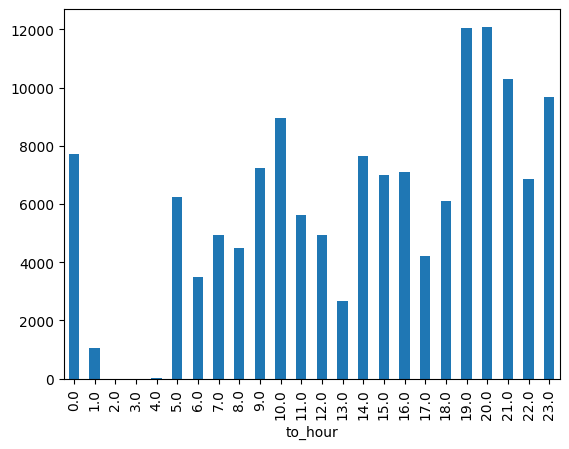

In [100]:
df['to_hour'].value_counts().sort_index().plot(kind='bar')

In [101]:
df.loc[(df['to_hour'] >= 0) & (df['to_hour'] < 3),'to_hour_segment'] = '1. 12 AM - 3 AM'
df.loc[(df['to_hour'] >= 3) & (df['to_hour'] < 6),'to_hour_segment'] = '2. 3 AM - 6 AM'
df.loc[(df['to_hour'] >= 6) & (df['to_hour'] < 9),'to_hour_segment'] = '3. 6 AM - 9 AM'
df.loc[(df['to_hour'] >= 9) & (df['to_hour'] < 12),'to_hour_segment'] = '4. 9 AM - 12 PM'
df.loc[(df['to_hour'] >= 12) & (df['to_hour'] < 15),'to_hour_segment'] = '5. 12 PM - 3 PM'
df.loc[(df['to_hour'] >= 15) & (df['to_hour'] < 18),'to_hour_segment'] = '6. 3 PM - 6 PM'
df.loc[(df['to_hour'] >= 18) & (df['to_hour'] < 21),'to_hour_segment'] = '7. 6 PM - 9 PM'
df.loc[(df['to_hour'] >= 21) & (df['to_hour'] < 24),'to_hour_segment'] = '8. 9 PM - 12 AM'

<Axes: xlabel='to_hour_segment'>

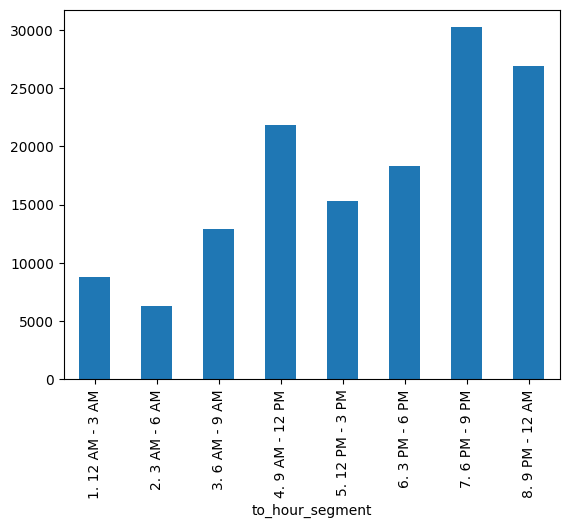

In [102]:
df['to_hour_segment'].value_counts().sort_index().plot(kind='bar')

In [103]:
df.columns

Index(['index', 'Report_Run_Time', 'carrier', 'from_loc', 'to_loc', 'stop',
       'price', 'from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'carbon_emission', 'overhead_bin', 'layover', 'details',
       'round_trip_duration', 'Airport_Route', 'From_City', 'To_City',
       'City_Route', 'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'Holiday', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Hours', 'Minutes', 'Flight_Time',
       'Fly_WeekDay', 'flight_duration_value', 'diff'],
      dtype='object')

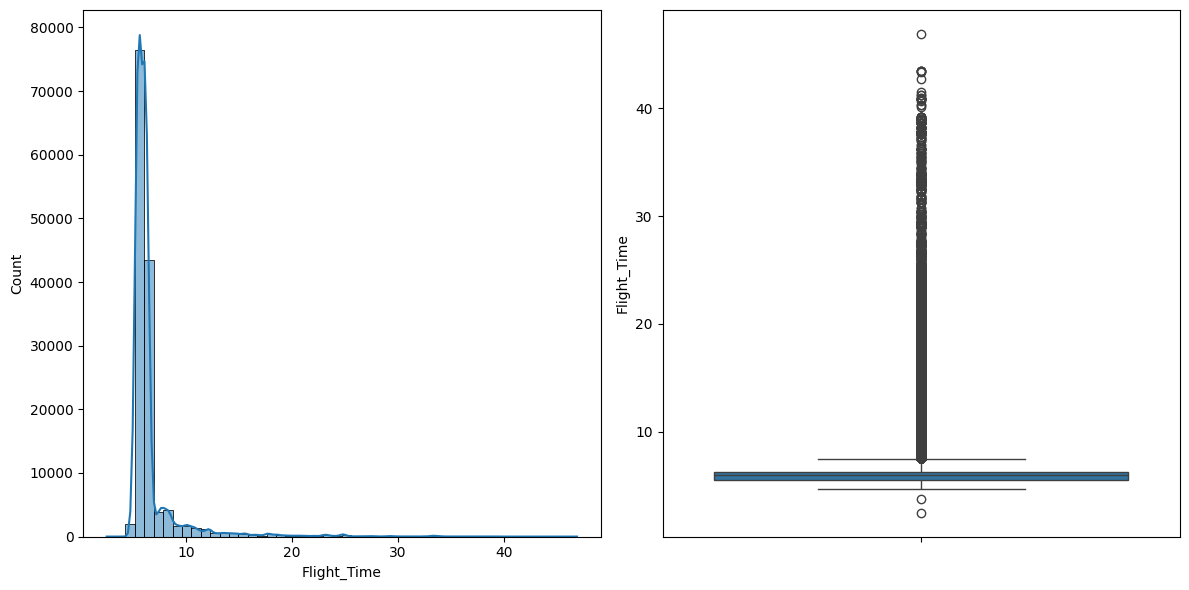

In [104]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['Flight_Time'], kde=True, bins=50)

plt.subplot(1,2,2)
sns.boxplot(df['Flight_Time'])

plt.tight_layout()

<Axes: xlabel='Flight_Time', ylabel='Count'>

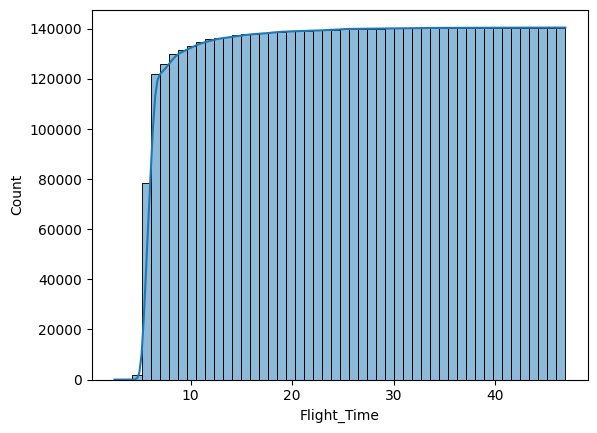

In [105]:
sns.histplot(df['Flight_Time'], kde=True, bins=50, cumulative=True)

In [106]:
flight_times = df['Flight_Time'].dropna()

hist, bins = np.histogram(flight_times, bins=50)

hist_df = pd.DataFrame({'Bin_Start': bins[:-1], 'Bin_End': bins[1:], 'Count': hist})

hist_df['Cumulative'] = hist_df['Count'].cumsum()

total_count = hist_df['Count'].sum()
hist_df['Cumulative %'] = (hist_df['Cumulative'] / total_count) * 100

hist_df


,Bin_Start,Bin_End,Count,Cumulative,Cumulative %
0,2.500,3.388,1,1,0.000712
1,3.388,4.276,1,2,0.001424
2,4.276,5.164,1966,1968,1.400921
3,5.164,6.052,76530,78498,55.878815
4,6.052,6.940,43469,121967,86.822230
5,6.940,7.828,3835,125802,89.552175
6,7.828,8.716,4171,129973,92.521302
7,8.716,9.604,1644,131617,93.691584
8,9.604,10.492,1624,133241,94.847628
9,10.492,11.380,1326,134567,95.791542


<Axes: xlabel='Flight_Time', ylabel='Count'>

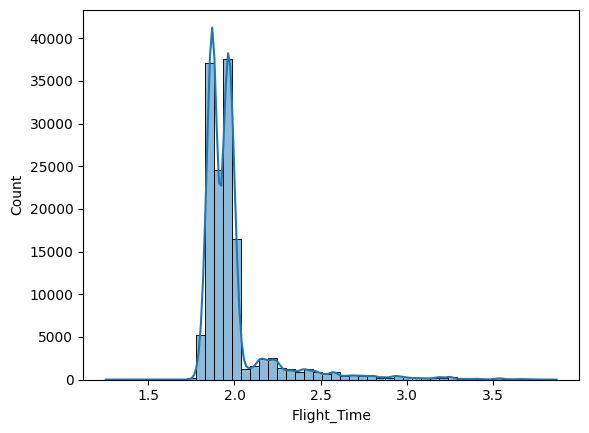

In [107]:
sns.histplot(np.log1p(df['Flight_Time']), kde=True, bins=50)

In [108]:
# Calculate the IQR for the 'price' column
Q1 = df['Flight_Time'].quantile(0.25)
Q3 = df['Flight_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'lower_bound is {lower_bound}')
print(f'upper_bound is {upper_bound}')


# Identify outliers
outliers = df[(df['Flight_Time'] < lower_bound) | (df['Flight_Time'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['Flight_Time'].describe()

num_outliers, outliers_price_stats

lower_bound is 4.300000000000001
upper_bound is 7.5


(16456,
 count    16456.00000
 mean        11.98338
 std          5.58090
 min          2.50000
 25%          8.30000
 50%         10.00000
 75%         13.40000
 max         46.90000
 Name: Flight_Time, dtype: float64)

In [109]:
df[df['Flight_Time']>20]

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Hours,Minutes,Flight_Time,Fly_WeekDay,flight_duration_value,diff
4,4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,2024-03-29 17:00:00,2024-03-28,...,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,27.0,31,27.5,4,3.5,24.0
99,99,2024-03-10,Spirit,EWR,LAX,1 stop,245.0,12:00:00,2024-03-23 22:46:00,2024-03-22,...,12,2024-03-22 12:00:00,2024-03-22 22:46:00,0 days 10:46:00,37.0,46,37.8,5,13.8,24.0
146,146,2024-03-10,Third Party,LGA,LAX,1 stop,242.0,12:29:00,2024-04-01 12:58:00,2024-03-31,...,21,2024-03-31 12:29:00,2024-03-31 12:58:00,0 days 00:29:00,27.0,29,27.5,7,3.5,24.0
660,660,2024-03-10,Spirit,EWR,LAX,1 stop,180.0,18:15:00,2024-04-13 20:12:00,2024-04-12,...,33,2024-04-12 18:15:00,2024-04-12 20:12:00,0 days 01:57:00,28.0,57,29.0,5,5.0,24.0
661,661,2024-03-10,Spirit,LGA,LAX,1 stop,212.0,12:49:00,2024-04-13 09:46:00,2024-04-12,...,33,2024-04-12 12:49:00,2024-04-13 09:46:00,0 days 20:57:00,23.0,57,24.0,5,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140087,140135,2024-04-06,Third Party,LAX,EWR,1 stop,162.0,11:40:00,2024-06-22 17:30:00,2024-06-21,...,76,2024-06-21 11:40:00,2024-06-22 17:30:00,1 days 05:50:00,26.0,50,26.8,5,2.8,24.0
140134,140182,2024-04-06,Third Party,LAX,LGA,3 stops,152.0,10:21:00,2024-04-30 10:09:00,2024-04-29,...,23,2024-04-29 10:21:00,2024-04-30 10:09:00,0 days 23:48:00,20.0,48,20.8,1,20.8,0.0
140160,140208,2024-04-06,Spirit,LAX,LGA,2 stops,102.0,14:22:00,2024-06-12 14:20:00,2024-06-11,...,66,2024-06-11 14:22:00,2024-06-12 14:20:00,0 days 23:58:00,20.0,58,21.0,2,21.0,0.0
140273,140321,2024-04-06,United,LAX,EWR,1 stop,204.0,23:59:00,2024-07-03 01:00:00,2024-07-01,...,86,2024-07-01 23:59:00,2024-07-02 01:00:00,0 days 01:01:00,22.0,1,22.0,1,-2.0,24.0


In [110]:
# plt.figure(figsize=(12,6))

# plt.subplot(1,2,1)
# sns.histplot(df['flight_duration_value'], kde=True, bins=25)

# plt.subplot(1,2,2)
# sns.boxplot(df['flight_duration_value'])

# plt.tight_layout()

In [111]:
# df['flight_duration_value'].mode()

### Observation

- High number of the flight duration is around 5 to 6 hours. 

In [112]:
df.columns

Index(['index', 'Report_Run_Time', 'carrier', 'from_loc', 'to_loc', 'stop',
       'price', 'from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'carbon_emission', 'overhead_bin', 'layover', 'details',
       'round_trip_duration', 'Airport_Route', 'From_City', 'To_City',
       'City_Route', 'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'Holiday', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Hours', 'Minutes', 'Flight_Time',
       'Fly_WeekDay', 'flight_duration_value', 'diff'],
      dtype='object')

In [113]:
df['flight_duration_value'] = df['Flight_Time']

In [114]:
df = df.drop(columns=['Flight_Time','Hours', 'Minutes','diff'])

In [115]:
df.columns

Index(['index', 'Report_Run_Time', 'carrier', 'from_loc', 'to_loc', 'stop',
       'price', 'from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'carbon_emission', 'overhead_bin', 'layover', 'details',
       'round_trip_duration', 'Airport_Route', 'From_City', 'To_City',
       'City_Route', 'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'Holiday', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Fly_WeekDay',
       'flight_duration_value'],
      dtype='object')

## 10.Carbon Emission

In [116]:
df.carbon_emission.unique()

array(['Carbon emissions estimate: 293 kilograms. -18% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 272 kilograms. -24% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 422 kilograms. +18% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 427 kilograms. +19% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 338 kilograms. -6% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 295 kilograms. -18% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 317 kilograms. -12% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 246 kilograms. -31% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 410 kilograms. +14% emissions. Learn more about this emissions estimate',
       'Carbon emiss

In [117]:
df.loc[~df['carbon_emission'].str.contains('emissions'),'carbon_emission'] = ""

In [118]:
df.carbon_emission.unique()

array(['Carbon emissions estimate: 293 kilograms. -18% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 272 kilograms. -24% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 422 kilograms. +18% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 427 kilograms. +19% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 338 kilograms. -6% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 295 kilograms. -18% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 317 kilograms. -12% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 246 kilograms. -31% emissions. Learn more about this emissions estimate',
       'Carbon emissions estimate: 410 kilograms. +14% emissions. Learn more about this emissions estimate',
       'Carbon emiss

In [119]:
df['carbon_array'] = df.carbon_emission.str.split(".")

In [120]:
def get_first_value(arr):
    if len(arr) > 0:
        return arr[0]
    else:
        return None

df['Carbon emissions estimate'] = df['carbon_array'].apply(lambda x: get_first_value(x))

In [121]:
df.tail(2)

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,to_hour_segment,Holiday,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Fly_WeekDay,flight_duration_value,carbon_array,Carbon emissions estimate
140477,140525,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,09:20:00,2024-07-04 18:15:00,2024-07-04,...,7. 6 PM - 9 PM,Holiday,89,2024-07-04 09:20:00,2024-07-05 18:15:00,1 days 08:55:00,4,5.9,"[Carbon emissions estimate: 298 kilograms, -1...",Carbon emissions estimate: 298 kilograms
140478,140526,2024-04-06,Delta,LAX,JFK,Nonstop,274.0,16:00:00,2024-07-05 00:37:00,2024-07-04,...,1. 12 AM - 3 AM,Holiday,89,2024-07-04 16:00:00,2024-07-05 00:37:00,0 days 08:37:00,4,5.6,"[Carbon emissions estimate: 298 kilograms, -1...",Carbon emissions estimate: 298 kilograms


In [122]:
df[['carbon_emission', 'carbon_array']]

,carbon_emission,carbon_array
0,Carbon emissions estimate: 293 kilograms. -18%...,"[Carbon emissions estimate: 293 kilograms, -1..."
1,Carbon emissions estimate: 272 kilograms. -24%...,"[Carbon emissions estimate: 272 kilograms, -2..."
2,Carbon emissions estimate: 422 kilograms. +18%...,"[Carbon emissions estimate: 422 kilograms, +1..."
3,Carbon emissions estimate: 427 kilograms. +19%...,"[Carbon emissions estimate: 427 kilograms, +1..."
4,Carbon emissions estimate: 338 kilograms. -6% ...,"[Carbon emissions estimate: 338 kilograms, -6..."
...,...,...
140474,Carbon emissions estimate: 300 kilograms. -15%...,"[Carbon emissions estimate: 300 kilograms, -1..."
140475,Carbon emissions estimate: 370 kilograms. Aver...,"[Carbon emissions estimate: 370 kilograms, Av..."
140476,Carbon emissions estimate: 298 kilograms. -15%...,"[Carbon emissions estimate: 298 kilograms, -1..."
140477,Carbon emissions estimate: 298 kilograms. -15%...,"[Carbon emissions estimate: 298 kilograms, -1..."


In [123]:
def get_second_value(arr):
    if len(arr) > 1:
        return arr[1]
    else:
        return None

df['carbon_emission_1'] = df['carbon_array'].apply(lambda x: get_second_value(x))

In [124]:
df[['carbon_emission','carbon_emission_1']]

,carbon_emission,carbon_emission_1
0,Carbon emissions estimate: 293 kilograms. -18%...,-18% emissions
1,Carbon emissions estimate: 272 kilograms. -24%...,-24% emissions
2,Carbon emissions estimate: 422 kilograms. +18%...,+18% emissions
3,Carbon emissions estimate: 427 kilograms. +19%...,+19% emissions
4,Carbon emissions estimate: 338 kilograms. -6% ...,-6% emissions
...,...,...
140474,Carbon emissions estimate: 300 kilograms. -15%...,-15% emissions
140475,Carbon emissions estimate: 370 kilograms. Aver...,Average emissions
140476,Carbon emissions estimate: 298 kilograms. -15%...,-15% emissions
140477,Carbon emissions estimate: 298 kilograms. -15%...,-15% emissions


### 10.1 Carbon Emission % (New Column)

In [125]:
df['carbon_emission%'] = df['carbon_emission_1'].fillna(df['carbon_emission'])

In [126]:
df.head()

,index,Report_Run_Time,carrier,from_loc,to_loc,stop,price,from_timestamp,to_timestamp,from_date,...,Days_to_Fly,from_timestamp_1,to_timestamp_1,flight_duration,Fly_WeekDay,flight_duration_value,carbon_array,Carbon emissions estimate,carbon_emission_1,carbon_emission%
0,0,2024-03-10,Spirit,EWR,LAX,Nonstop,211.0,06:47:00,2024-03-28 10:15:00,2024-03-28,...,18,2024-03-28 06:47:00,2024-03-28 10:15:00,0 days 03:28:00,4,6.5,"[Carbon emissions estimate: 293 kilograms, -1...",Carbon emissions estimate: 293 kilograms,-18% emissions,-18% emissions
1,1,2024-03-10,Alaska,EWR,LAX,Nonstop,297.0,07:30:00,2024-03-28 10:48:00,2024-03-28,...,18,2024-03-28 07:30:00,2024-03-28 10:48:00,0 days 03:18:00,4,6.3,"[Carbon emissions estimate: 272 kilograms, -2...",Carbon emissions estimate: 272 kilograms,-24% emissions,-24% emissions
2,2,2024-03-10,JetBlue,EWR,LAX,Nonstop,298.0,05:15:00,2024-03-28 08:30:00,2024-03-28,...,18,2024-03-28 05:15:00,2024-03-28 08:30:00,0 days 03:15:00,4,6.2,"[Carbon emissions estimate: 422 kilograms, +1...",Carbon emissions estimate: 422 kilograms,+18% emissions,+18% emissions
3,3,2024-03-10,United,EWR,LAX,Nonstop,302.0,12:00:00,2024-03-28 15:24:00,2024-03-28,...,18,2024-03-28 12:00:00,2024-03-28 15:24:00,0 days 03:24:00,4,6.4,"[Carbon emissions estimate: 427 kilograms, +1...",Carbon emissions estimate: 427 kilograms,+19% emissions,+19% emissions
4,4,2024-03-10,Spirit,LGA,LAX,1 stop,269.0,16:29:00,2024-03-29 17:00:00,2024-03-28,...,18,2024-03-28 16:29:00,2024-03-28 17:00:00,0 days 00:31:00,4,27.5,"[Carbon emissions estimate: 338 kilograms, -6...",Carbon emissions estimate: 338 kilograms,-6% emissions,-6% emissions


In [127]:
df[['Carbon emissions estimate', 'carbon_emission%']]

,Carbon emissions estimate,carbon_emission%
0,Carbon emissions estimate: 293 kilograms,-18% emissions
1,Carbon emissions estimate: 272 kilograms,-24% emissions
2,Carbon emissions estimate: 422 kilograms,+18% emissions
3,Carbon emissions estimate: 427 kilograms,+19% emissions
4,Carbon emissions estimate: 338 kilograms,-6% emissions
...,...,...
140474,Carbon emissions estimate: 300 kilograms,-15% emissions
140475,Carbon emissions estimate: 370 kilograms,Average emissions
140476,Carbon emissions estimate: 298 kilograms,-15% emissions
140477,Carbon emissions estimate: 298 kilograms,-15% emissions


In [128]:
df['Carbon emissions estimate'] = df['Carbon emissions estimate'].str.replace('Carbon emissions estimate: ','')
df['carbon_emission%'] = df['carbon_emission%'].str.replace(' emissions','')

In [129]:
df[['Carbon emissions estimate', 'carbon_emission%']]

,Carbon emissions estimate,carbon_emission%
0,293 kilograms,-18%
1,272 kilograms,-24%
2,422 kilograms,+18%
3,427 kilograms,+19%
4,338 kilograms,-6%
...,...,...
140474,300 kilograms,-15%
140475,370 kilograms,Average
140476,298 kilograms,-15%
140477,298 kilograms,-15%


In [130]:
df['Carbon emissions estimate'].unique()

array(['293 kilograms', '272 kilograms', '422 kilograms', '427 kilograms',
       '338 kilograms', '295 kilograms', '317 kilograms', '246 kilograms',
       '410 kilograms', '406 kilograms', '408 kilograms', '346 kilograms',
       '273 kilograms', '255 kilograms', '314 kilograms', '556 kilograms',
       '215 kilograms', '290 kilograms', '402 kilograms', '421 kilograms',
       '277 kilograms', '350 kilograms', '343 kilograms', '328 kilograms',
       '416 kilograms', '548 kilograms', '341 kilograms', '264 kilograms',
       '307 kilograms', '251 kilograms', '333 kilograms', '267 kilograms',
       '256 kilograms', '283 kilograms', '360 kilograms', '395 kilograms',
       '313 kilograms', '291 kilograms', '278 kilograms', '534 kilograms',
       '289 kilograms', '282 kilograms', '262 kilograms', '288 kilograms',
       '326 kilograms', '257 kilograms', '411 kilograms',
       '7,351 kilograms', '361 kilograms', '356 kilograms',
       '392 kilograms', '538 kilograms', '252 kilograms',

In [131]:
df.loc[df['Carbon emissions estimate'].str.contains('%'),'Carbon emissions estimate'] = ''

In [132]:
df['Carbon emissions estimate'] = df['Carbon emissions estimate'].str.replace(' kilograms','')

In [133]:
df['Carbon emissions estimate'].unique()

array(['293', '272', '422', '427', '338', '295', '317', '246', '410',
       '406', '408', '346', '273', '255', '314', '556', '215', '290',
       '402', '421', '277', '350', '343', '328', '416', '548', '341',
       '264', '307', '251', '333', '267', '256', '283', '360', '395',
       '313', '291', '278', '534', '289', '282', '262', '288', '326',
       '257', '411', '7,351', '361', '356', '392', '538', '252', '390',
       '301', '263', '280', '296', '506', '325', '370', '298', '302',
       '285', '329', '415', '308', '434', '311', '7,376', '297', '7,240',
       '330', '383', '357', '419', '367', '279', '397', '347', '294',
       '409', '316', '281', '303', '379', '269', '319', '8,798', '359',
       '355', '324', '362', '376', '345', '305', '322', '320', '386',
       '412', '242', '405', '384', '533', '249', '299', '260', '253',
       '424', '368', '275', '258', '306', '7,368', '327', '371', '400',
       '382', '239', '531', '378', '381', '259', '248', '250', '315',
       '29

### 10.2 Carbon emissions estimate num (New Column)

In [134]:
df['Carbon emissions estimate num'] = pd.to_numeric(df['Carbon emissions estimate'], errors='coerce').astype('Int64')

In [135]:
df.loc[(df['Carbon emissions estimate'].str.contains('1'))
       | (df['Carbon emissions estimate'].str.contains('2'))
       | (df['Carbon emissions estimate'].str.contains('3'))
       | (df['Carbon emissions estimate'].str.contains('4'))
       | (df['Carbon emissions estimate'].str.contains('5'))
       | (df['Carbon emissions estimate'].str.contains('6'))
       | (df['Carbon emissions estimate'].str.contains('7'))
       | (df['Carbon emissions estimate'].str.contains('8'))
       | (df['Carbon emissions estimate'].str.contains('9')),
       'Carbon emissions estimate'] = df['Carbon emissions estimate num']

In [136]:
df['Carbon emissions estimate'].unique()

array([293, 272, 422, 427, 338, 295, 317, 246, 410, 406, 408, 346, 273,
       255, 314, 556, 215, 290, 402, 421, 277, 350, 343, 328, 416, 548,
       341, 264, 307, 251, 333, 267, 256, 283, 360, 395, 313, 291, 278,
       534, 289, 282, 262, 288, 326, 257, 411, <NA>, 361, 356, 392, 538,
       252, 390, 301, 263, 280, 296, 506, 325, 370, 298, 302, 285, 329,
       415, 308, 434, 311, 297, 330, 383, 357, 419, 367, 279, 397, 347,
       294, 409, 316, 281, 303, 379, 269, 319, 359, 355, 324, 362, 376,
       345, 305, 322, 320, 386, 412, 242, 405, 384, 533, 249, 299, 260,
       253, 424, 368, 275, 258, 306, 327, 371, 400, 382, 239, 531, 378,
       381, 259, 248, 250, 315, 292, 238, 399, 323, 529, 441, 398, 396,
       236, 332, 545, 210, 245, 268, 352, 348, 435, 496, 241, 404, 537,
       309, 244, 407, 321, 418, 349, 429, 312, 431, 354, 358, 266, 451,
       428, 287, 335, 372, 342, 353, 403, 344, 817, 366, 387, 300, 443,
       364, 271, 532, 471, 420, 331, 270, 389, 363, 520, 454, 3

In [137]:
df['Carbon emissions estimate num'].unique()

<IntegerArray>
[293, 272, 422, 427, 338, 295, 317, 246, 410, 406,
 ...
 799, 643, 500, 240, 472, 677, 604, 459, 528, 585]
Length: 306, dtype: Int64

<Axes: >

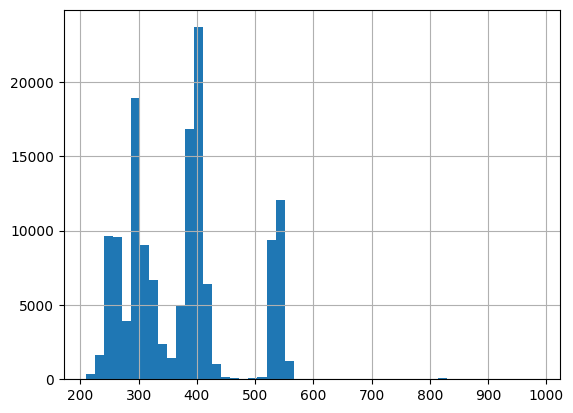

In [138]:
df['Carbon emissions estimate num'].hist(bins=50)

#### Observation

- Most of the flight have carbon emission around 400 kg CO2e (Carbon dioxide equivalent)

In [139]:
df['carbon_emission%'].unique()

array([' -18%', ' -24%', ' +18%', ' +19%', ' -6%', ' -12%', ' -31%',
       ' +14%', ' +13%', ' Average', ' -29%', ' -13%', ' +55%', ' -40%',
       ' -19%', ' +12%', ' +17%', ' -23%', ' -9%', ' +16%', ' +53%',
       ' -26%', ' -14%', ' -30%', ' -7%', ' -21%', ' +10%', ' +49%',
       ' -27%', ' -20%', ' -28%', ' +1,948%', ' +9%', ' +50%', ' -16%',
       ' -22%', ' +41%', ' -17%', ' -8%', ' +21%', ' +1,955%', ' +1,917%',
       ' +7%', ' +11%', ' +6%', ' -25%', ' -11%', ' +2,351%', ' -10%',
       ' -15%', ' +8%', ' +15%', ' -33%', ' +48%', ' +1,952%', ' -32%',
       ' +51%', ' +25%', ' +20%', ' +24%', ' +22%', ' +28%', ' +132%',
       ' +23%', ' +1,923%', ' +31%', ' +29%', ' +26%', ' +47%', ' +133%',
       ' +45%', ' +2,394%', '', ' +39%', ' +1,904%', ' +93%', ' +81%',
       ' +85%', ' +97%', ' +37%', ' +1,922%', ' +124%', ' +1,957%',
       ' +59%', ' +70%', ' +129%', ' +32%', ' +40%', ' +43%', ' +52%',
       ' +46%', ' -41%', ' +54%', ' +131%', ' +2,356%', ' +91%', ' +35%',
 

### 10.3 carbon_emission% num (New Column)

In [140]:
df['carbon_emission% num'] = df['carbon_emission%'].str.replace(',','')
df['carbon_emission% num'] = df['carbon_emission% num'].str.replace('%','')
df['carbon_emission% num'] = df['carbon_emission% num'].str.replace(' ','')
df['carbon_emission% num'] = df['carbon_emission% num'].str.replace('Avg','0')
df['carbon_emission% num'] = df['carbon_emission% num'].str.replace('Average','0')

In [141]:
df['carbon_emission% num'].unique()

array(['-18', '-24', '+18', '+19', '-6', '-12', '-31', '+14', '+13', '0',
       '-29', '-13', '+55', '-40', '-19', '+12', '+17', '-23', '-9',
       '+16', '+53', '-26', '-14', '-30', '-7', '-21', '+10', '+49',
       '-27', '-20', '-28', '+1948', '+9', '+50', '-16', '-22', '+41',
       '-17', '-8', '+21', '+1955', '+1917', '+7', '+11', '+6', '-25',
       '-11', '+2351', '-10', '-15', '+8', '+15', '-33', '+48', '+1952',
       '-32', '+51', '+25', '+20', '+24', '+22', '+28', '+132', '+23',
       '+1923', '+31', '+29', '+26', '+47', '+133', '+45', '+2394', '',
       '+39', '+1904', '+93', '+81', '+85', '+97', '+37', '+1922', '+124',
       '+1957', '+59', '+70', '+129', '+32', '+40', '+43', '+52', '+46',
       '-41', '+54', '+131', '+2356', '+91', '+35', '+92', '+205', '+250',
       '-34', '+130', '+79', '+74', '+1909', '+1956', '+56', '+69',
       '+174', '+99', '+27', '+38', '+1949', '+30', '+1898', '+1911',
       '+1918', '+2382', '+1942', '+1950', '+98', '+1916', '+34', '+9

In [142]:
df[df['carbon_emission% num'] == '0']['Carbon emissions estimate'].min()

333

In [143]:
df[df['carbon_emission% num'] == '0']['Carbon emissions estimate'].max()

379

In [144]:
df.loc[df['carbon_emission% num'].str.contains('-'), 'carbon_emission% num symbol'] = '-'
df.loc[df['carbon_emission% num'].str.contains('\+'), 'carbon_emission% num symbol'] = '+'

In [145]:
df['carbon_emission% num symbol'].unique()

array(['-', '+', nan], dtype=object)

In [146]:
df['carbon_emission% num'] = df['carbon_emission% num'].str.replace('-','')
df['carbon_emission% num'] = df['carbon_emission% num'].str.replace('+','')

In [147]:
df['carbon_emission% num'].unique()

array(['18', '24', '19', '6', '12', '31', '14', '13', '0', '29', '55',
       '40', '17', '23', '9', '16', '53', '26', '30', '7', '21', '10',
       '49', '27', '20', '28', '1948', '50', '22', '41', '8', '1955',
       '1917', '11', '25', '2351', '15', '33', '48', '1952', '32', '51',
       '132', '1923', '47', '133', '45', '2394', '', '39', '1904', '93',
       '81', '85', '97', '37', '1922', '124', '1957', '59', '70', '129',
       '43', '52', '46', '54', '131', '2356', '91', '35', '92', '205',
       '250', '34', '130', '79', '74', '1909', '1956', '56', '69', '174',
       '99', '38', '1949', '1898', '1911', '1918', '2382', '1942', '1950',
       '98', '1916', '90', '166', '1947', '2387', '102', '1931', '1935',
       '2368', '2330', '1900', '1887', '127', '1905', '1938', '1906',
       '1939', '2344', '128', '62', '2389', '75', '61', '83', '1930',
       '84', '89', '87', '42', '80', '2349', '2398', '2401', '88', '1989',
       '1991', '123', '1966', '1928', '1934', '1959', '36', '

In [148]:
df['carbon_emission% num'] = pd.to_numeric(df['carbon_emission% num'], errors='coerce').astype('Int64')
df['carbon_emission% num'].unique()

<IntegerArray>
[  18,   24,   19,    6,   12,   31,   14,   13,    0,   29,
 ...
  272,  243, 1960, 1995, 1927, 2405, 2396, 1958, 1962,   66]
Length: 165, dtype: Int64

In [149]:
df.loc[df['carbon_emission% num symbol'] == '+', 'carbon_emission% num'] = df['carbon_emission% num'] + 100
df.loc[df['carbon_emission% num symbol'] == '-', 'carbon_emission% num'] = 100 - df['carbon_emission% num']
df.loc[df['carbon_emission% num'] == 0, 'carbon_emission% num'] = 100

In [150]:
df['carbon_emission% num'].unique()

<IntegerArray>
[  82,   76,  118,  119,   94,   88,   69,  114,  113,  100,
 ...
  372,  343, 2060, 2095, 2027, 2505, 2496, 2058, 2062,  166]
Length: 196, dtype: Int64

<Axes: >

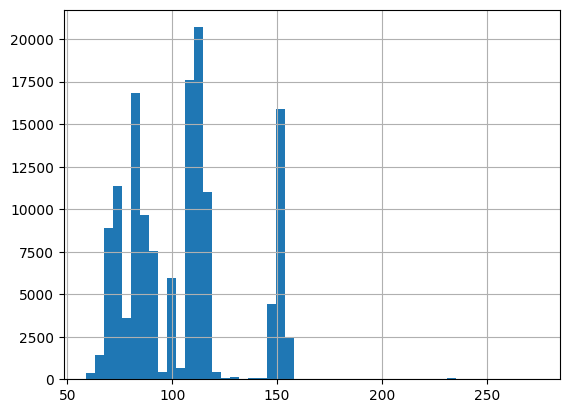

In [151]:
df[df['carbon_emission% num']<300]['carbon_emission% num'].hist(bins=50)

#### Observation
- Most flights have 20% more emission than normal
- Other most flights have 20% less emission than normal

## 11.Overhead bin

In [152]:
df.overhead_bin.value_counts()

overhead_bin
This price for this flight doesn't include overhead bin access. If you need a carry-on bag, use the Bags filter to update prices.$204    1642
This price for this flight doesn't include overhead bin access. If you need a carry-on bag, use the Bags filter to update prices.$254    1571
$274                                                                                                                                     1508
$244                                                                                                                                     1437
$319                                                                                                                                     1255
                                                                                                                                         ... 
$948                                                                                                                                   

In [153]:
df.loc[df['overhead_bin'].str.contains("doesn't include overhead bin access"), 'overhead_bin'] = 'Additional charge for overhead bin'
df.loc[df['overhead_bin'].str.startswith("$"), 'overhead_bin'] = 'No additional charge for overhead bin'

In [154]:
df.overhead_bin.value_counts()

overhead_bin
Additional charge for overhead bin       75354
No additional charge for overhead bin    65125
Name: count, dtype: int64

### Observation
- Comparatively more flights have additional charge for carry on bag 
- However, there are equally good amount of flight that have no additional charge for carry on bags

## 12.Layover

### 12.1 Layover count (New Column)

In [155]:
df.loc[df['layover'].str.contains("(1 of 3)", na=False), 'layover_count'] = 3
df.loc[df['layover'].str.contains("(1 of 2)", na=False), 'layover_count'] = 2
df.loc[df['layover'].str.contains("(1 of 1)", na=False), 'layover_count'] = 1
df['layover_count'] = df['layover_count'].fillna(0)


C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1481990700.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['layover'].str.contains("(1 of 3)", na=False), 'layover_count'] = 3
C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1481990700.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['layover'].str.contains("(1 of 2)", na=False), 'layover_count'] = 2
C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1481990700.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['layover'].str.contains("(1 of 1)", na=False), 'layover_count'] = 1


In [156]:
df.layover_count.value_counts()

layover_count
0.0    121405
1.0     17004
2.0      1930
3.0       140
Name: count, dtype: int64

#### Observation
- Most of the flight do not have any layovers. 

## 13.Details

## 14.Trip Duration

### 14.1Trip Type (New Column)

In [157]:
df.loc[df.round_trip_duration == 0, 'Trip_Type'] = 'One Way'
df.loc[df.round_trip_duration > 0, 'Trip_Type'] = 'Rounds Trip'

In [158]:
df.Trip_Type.value_counts()

Trip_Type
Rounds Trip    77143
One Way        63336
Name: count, dtype: int64

#### Observation
- There are approximately equal number of trip types

# Source Dataframe

In [159]:
# saving primary DataFrame as source_df_details that can be referred back as and when needed. 

source_df_details = df

In [160]:
df = source_df_details

In [161]:
df.columns

Index(['index', 'Report_Run_Time', 'carrier', 'from_loc', 'to_loc', 'stop',
       'price', 'from_timestamp', 'to_timestamp', 'from_date', 'to_date',
       'carbon_emission', 'overhead_bin', 'layover', 'details',
       'round_trip_duration', 'Airport_Route', 'From_City', 'To_City',
       'City_Route', 'from_hour', 'from_hour_segment', 'to_hour',
       'to_hour_segment', 'Holiday', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'flight_duration', 'Fly_WeekDay',
       'flight_duration_value', 'carbon_array', 'Carbon emissions estimate',
       'carbon_emission_1', 'carbon_emission%',
       'Carbon emissions estimate num', 'carbon_emission% num',
       'carbon_emission% num symbol', 'layover_count', 'Trip_Type'],
      dtype='object')

In [162]:
df = df[['Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route',
       'City_Route', 'stop', 'price','overhead_bin', 'layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num','Days_to_Fly',
       'from_timestamp_1', 'to_timestamp_1', 'from_hour_segment', 'to_hour_segment','flight_duration_value','Holiday','Fly_WeekDay']]

In [163]:
df[df.duplicated()].shape
df = df.drop_duplicates(keep='first')

In [164]:
df.head(2)

,Report_Run_Time,carrier,Trip_Type,Airport_Route,City_Route,stop,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay
0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,New York City - Los Angeles,Nonstop,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4
1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,New York City - Los Angeles,Nonstop,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4


# EDA - Multivariate Analysis

#### Observation
- price is target variable, so let perform multivariate EDA using price as primary data point

In [165]:
# price vs carrier
# price vs trip_type
# price vs airport route
# price vs city route
# price vs stop
# price vs layover count
# price vs round trip duration
# price vs Carbon emissions estimate num
# price vs carbon_emission% num
# price vs Days_to_Fly
# price vs from_hour_segment
# price vs to_hour_segment
# price vs flight_duration_value

## Price vs Carrier 

### Price vs carrier vs city route

C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1400749382.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1400749382.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bx.set_xticklabels(bx.get_xticklabels(), rotation=90)


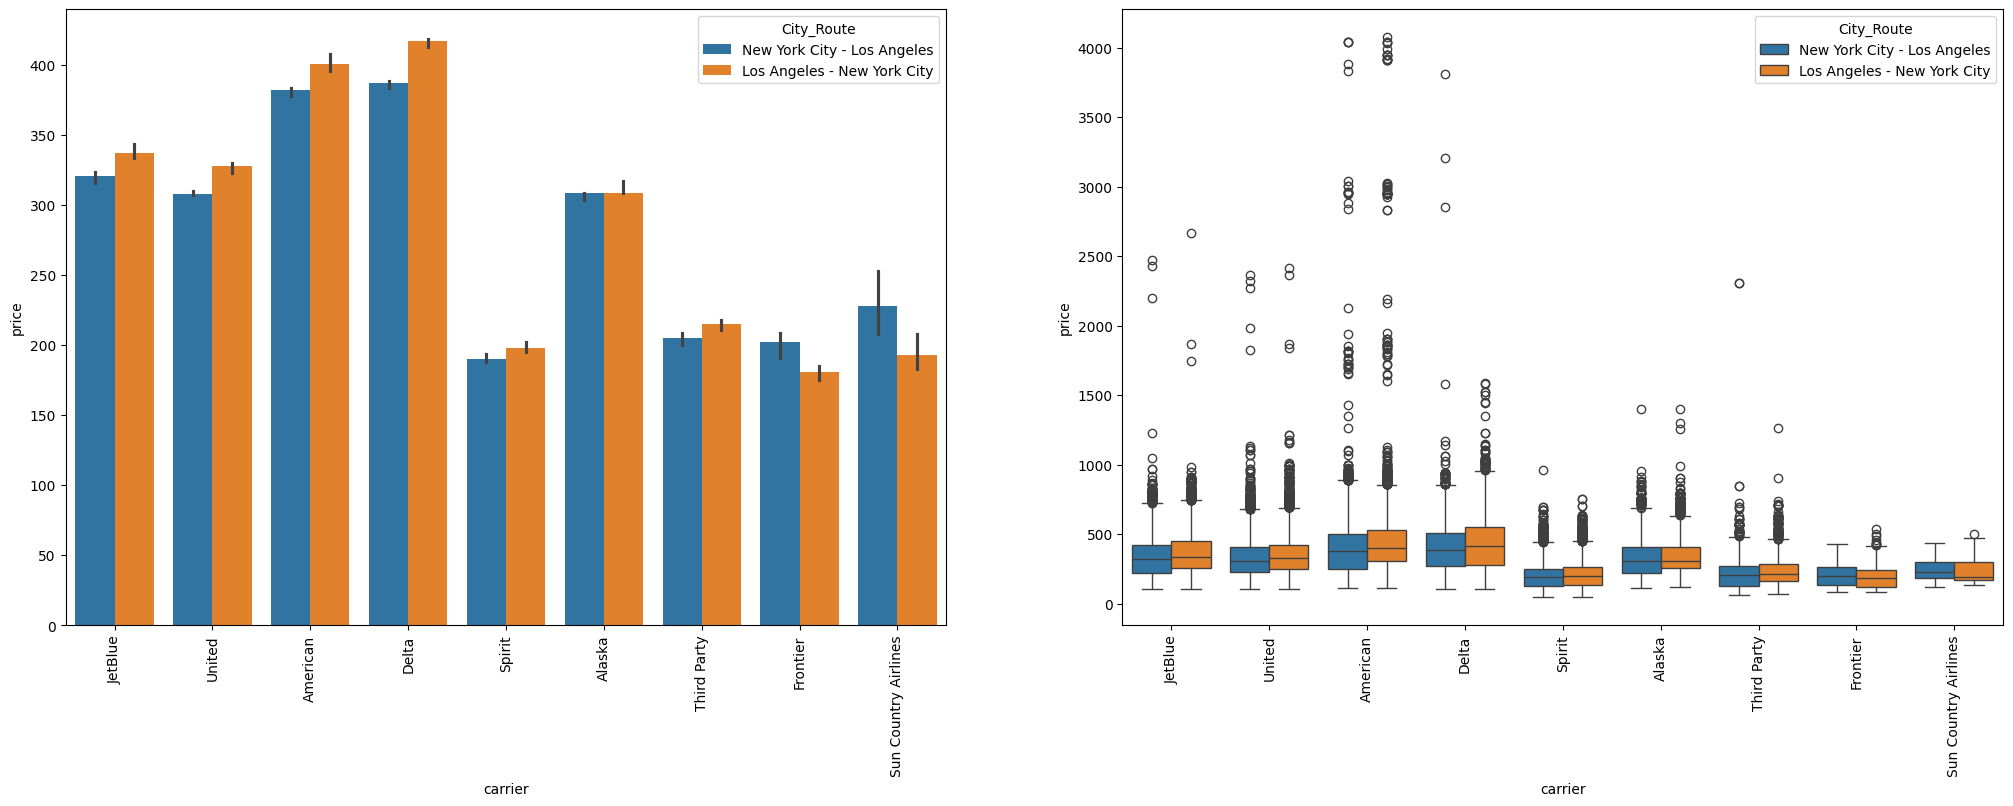

<Figure size 640x480 with 0 Axes>

In [166]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
carrier_counts = df['carrier'].value_counts()
ordered_carriers = carrier_counts.index

ax = sns.barplot(x=df['carrier'], y=df['price'], hue=df['City_Route'], order=ordered_carriers, estimator=np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.show()

plt.subplot(1,2,2)
bx = sns.boxplot(x=df['carrier'], y=df['price'], hue=df['City_Route'],order=ordered_carriers)
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)
plt.show()

plt.tight_layout()
plt.show()

In [167]:
pivot_table_mean = pd.pivot_table(df,index='carrier',columns='City_Route',values='price',aggfunc='mean')
pivot_table_mean

City_Route,Los Angeles - New York City,New York City - Los Angeles
carrier,,
Alaska,338.200389,319.881728
American,428.063872,398.348241
Delta,436.678392,398.131392
Frontier,189.194030,206.319658
JetBlue,361.784437,332.675268
Spirit,211.748876,202.487283
Sun Country Airlines,230.492537,245.728814
Third Party,234.032274,215.866667
United,347.800765,329.348263


<Axes: xlabel='City_Route', ylabel='carrier'>

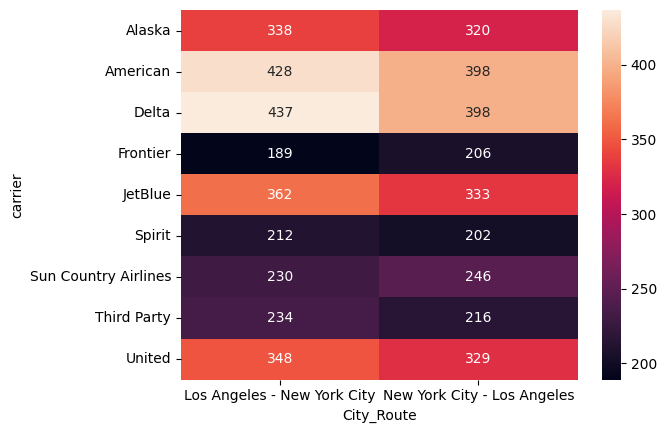

In [168]:
sns.heatmap(pivot_table_mean, annot=True, fmt=".0f")

In [169]:
from scipy.stats import mode
from collections import Counter


def mode_func(x):
    if len(x) > 0:
        counts = Counter(x)
        mode = max(counts, key=counts.get)
        return mode
    else:
        return None

# Create the pivot table with the custom function as aggfunc
pivot_table_mode = pd.pivot_table(df, index='carrier', columns='City_Route', values='price', aggfunc=mode_func)

# Display the pivot table
pivot_table_mode

City_Route,Los Angeles - New York City,New York City - Los Angeles
carrier,,
Alaska,259.0,219.0
American,244.0,244.0
Delta,274.0,274.0
Frontier,119.0,96.0
JetBlue,254.0,204.0
Spirit,96.0,118.0
Sun Country Airlines,183.0,253.0
Third Party,99.0,96.0
United,160.0,124.0


<Axes: xlabel='City_Route', ylabel='carrier'>

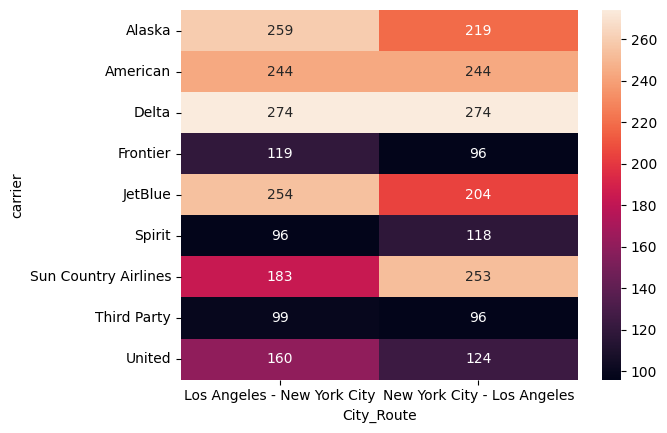

In [170]:
sns.heatmap(pivot_table_mode, annot=True, fmt=".0f")

#### Observation
- American and Delta seems to have higher price than other carriers. 
- Looking at the box plot American airlines seems to have most number of outliers. (May be the due to these variations average price is higher, however after checking mode value, point 1 seems to be a valid observation.)

### Price vs carrier vs trip_type

<Axes: xlabel='carrier', ylabel='price'>

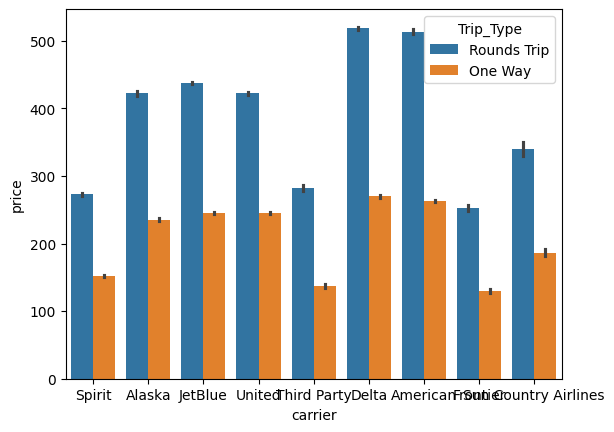

In [171]:
sns.barplot(x = df['carrier'], y = df['price'], hue=df['Trip_Type'])

<Axes: xlabel='carrier', ylabel='price'>

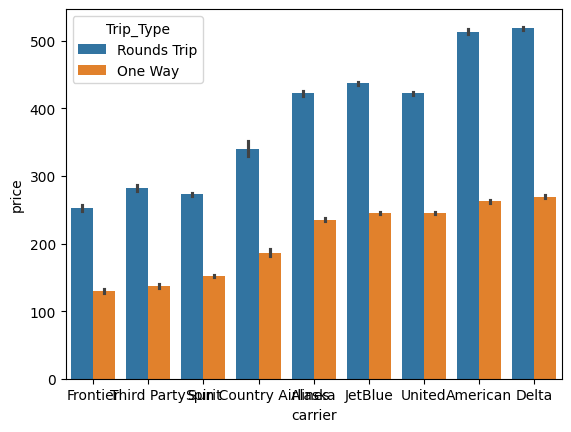

In [172]:
df_sorted = df[df['Trip_Type'] == 'One Way'].groupby('carrier')['price'].mean().sort_values().index
sns.barplot(x='carrier', y='price', hue='Trip_Type', data=df, order=df_sorted)

#### Observation
- Carrier that have higher mean price for one way have higher mean price for round trip 

### Price vs carrier vs trip_type

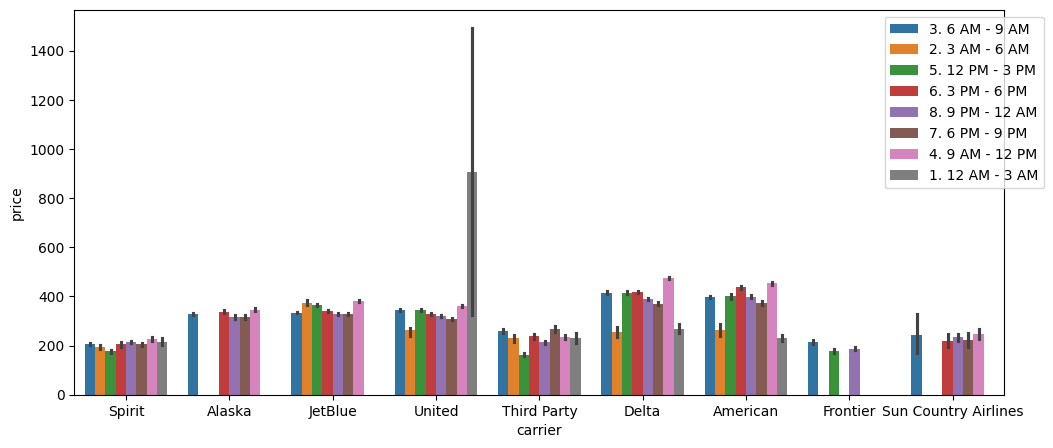

In [173]:
plt.figure(figsize=(12,5))
sns.barplot(x = df['carrier'], y = df['price'], hue=df['from_hour_segment'])
plt.legend(bbox_to_anchor=(1.05, 1))

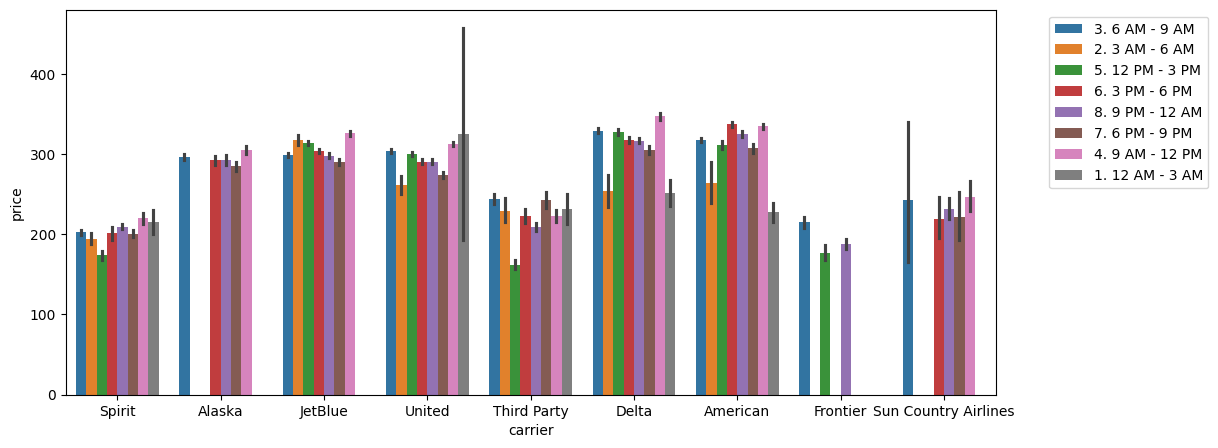

In [174]:
plt.figure(figsize=(12,5))
sns.barplot(x = df[df['price'] < 500]['carrier'], y = df[df['price'] < 500]['price'], hue=df[df['price'] < 500]['from_hour_segment'])
plt.legend(bbox_to_anchor=(1.05, 1))

#### Observation
- Jet Blue seems to have consistent avg price for different fly hour segment of start time compared to others. 
- For 3-6 AM Jet Blue seems to have relatively higher price whereas other carriers seems to have relatively lower price compared their hour segment. 

## price vs trip_type

<Axes: xlabel='Trip_Type', ylabel='price'>

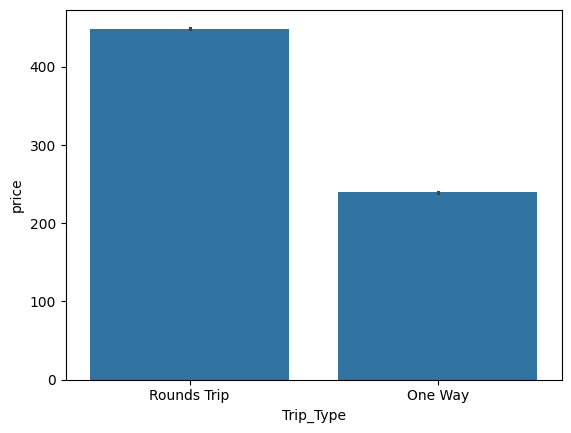

In [175]:
sns.barplot(x=df['Trip_Type'], y=df['price'])

### price vs trip type vs carrier

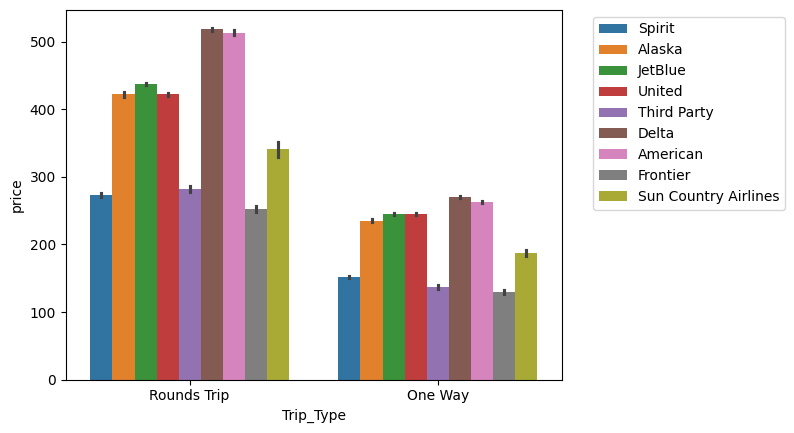

In [176]:
sns.barplot(x=df['Trip_Type'], y=df['price'], hue=df['carrier'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## price vs airport route

<Axes: xlabel='Airport_Route', ylabel='price'>

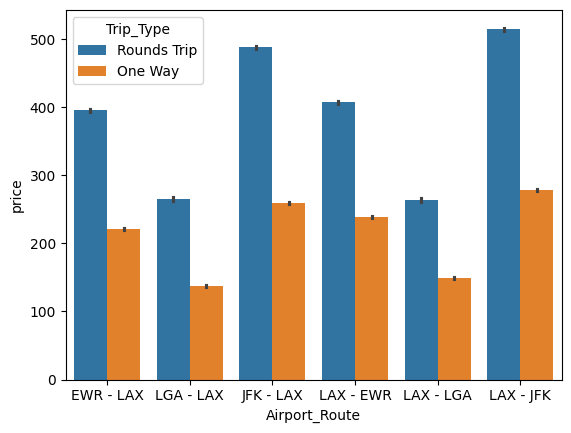

In [177]:
sns.barplot(x = df['Airport_Route'], y = df['price'], hue=df['Trip_Type'])

### price vs airport route vs city route

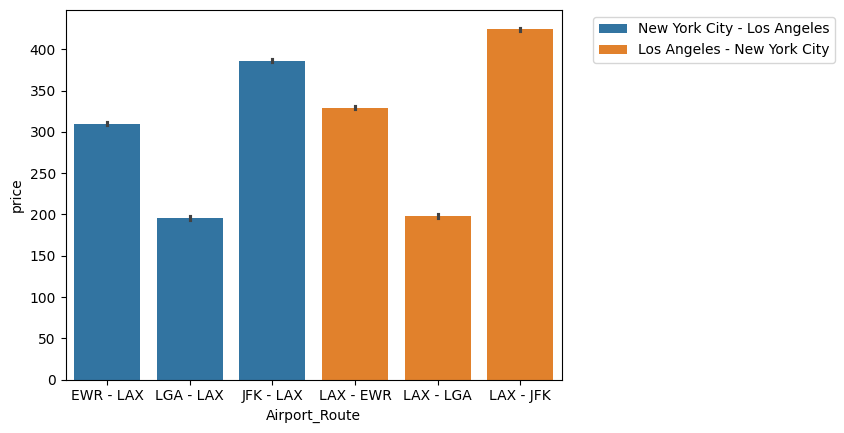

In [178]:
sns.barplot(x = df['Airport_Route'], y = df['price'], hue=df['City_Route'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### Observation
- route to and from LGA seems to have lower price
- LGA, EWR, JFK seems to be lower to higher route by average price

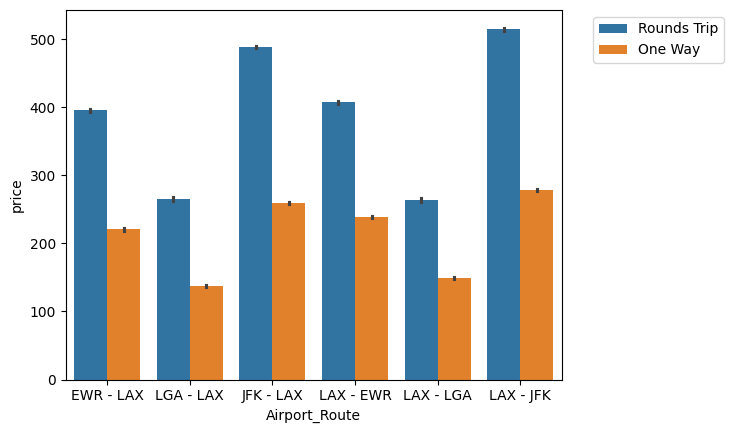

In [179]:
sns.barplot(x = df['Airport_Route'], y = df['price'], hue=df['Trip_Type'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## price vs city route


<Axes: xlabel='City_Route', ylabel='price'>

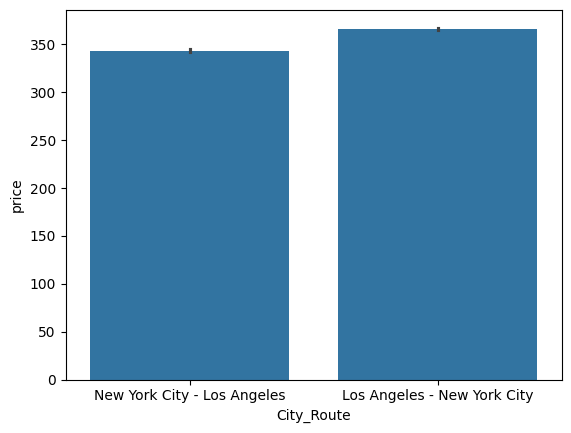

In [180]:
sns.barplot(x = df['City_Route'], y = df['price'])

## price vs stop

In [181]:
# stop and layover count are same. skipping stop feature EDA

## price vs layover count


<Axes: xlabel='layover_count', ylabel='price'>

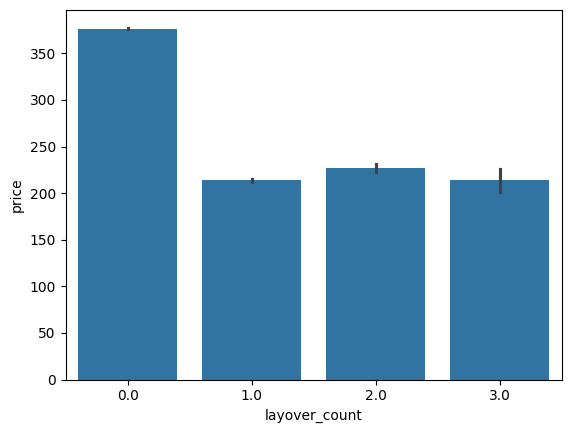

In [182]:
sns.barplot(x = df['layover_count'], y = df['price'])

### Observation
- Non stop flights have higher price compared to flights with layover

### price vs layover vs carrier

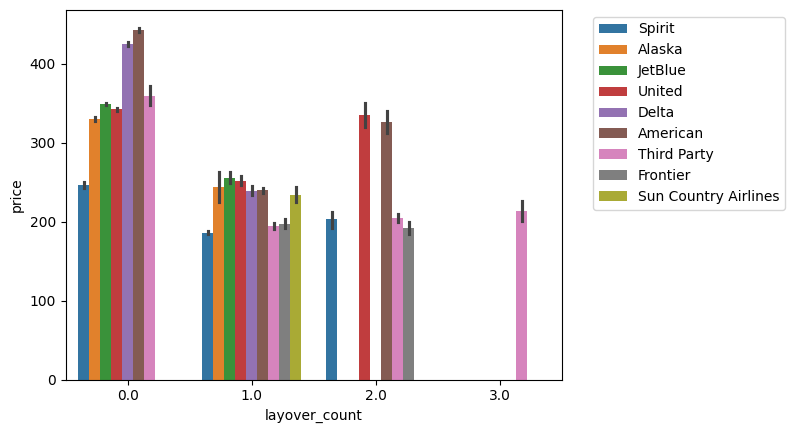

In [183]:
sns.barplot(x = df['layover_count'], y = df['price'], hue=df['carrier'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### price vs layover vs trip_type

<Axes: xlabel='layover_count', ylabel='price'>

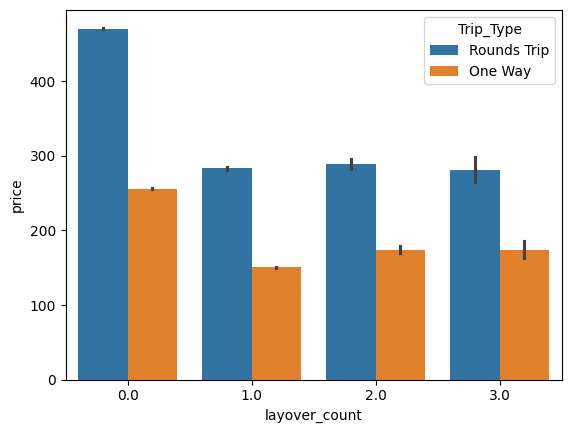

In [184]:
sns.barplot(x = df['layover_count'], y = df['price'], hue= df['Trip_Type'])

## price vs round trip duration


<Axes: xlabel='round_trip_duration', ylabel='price'>

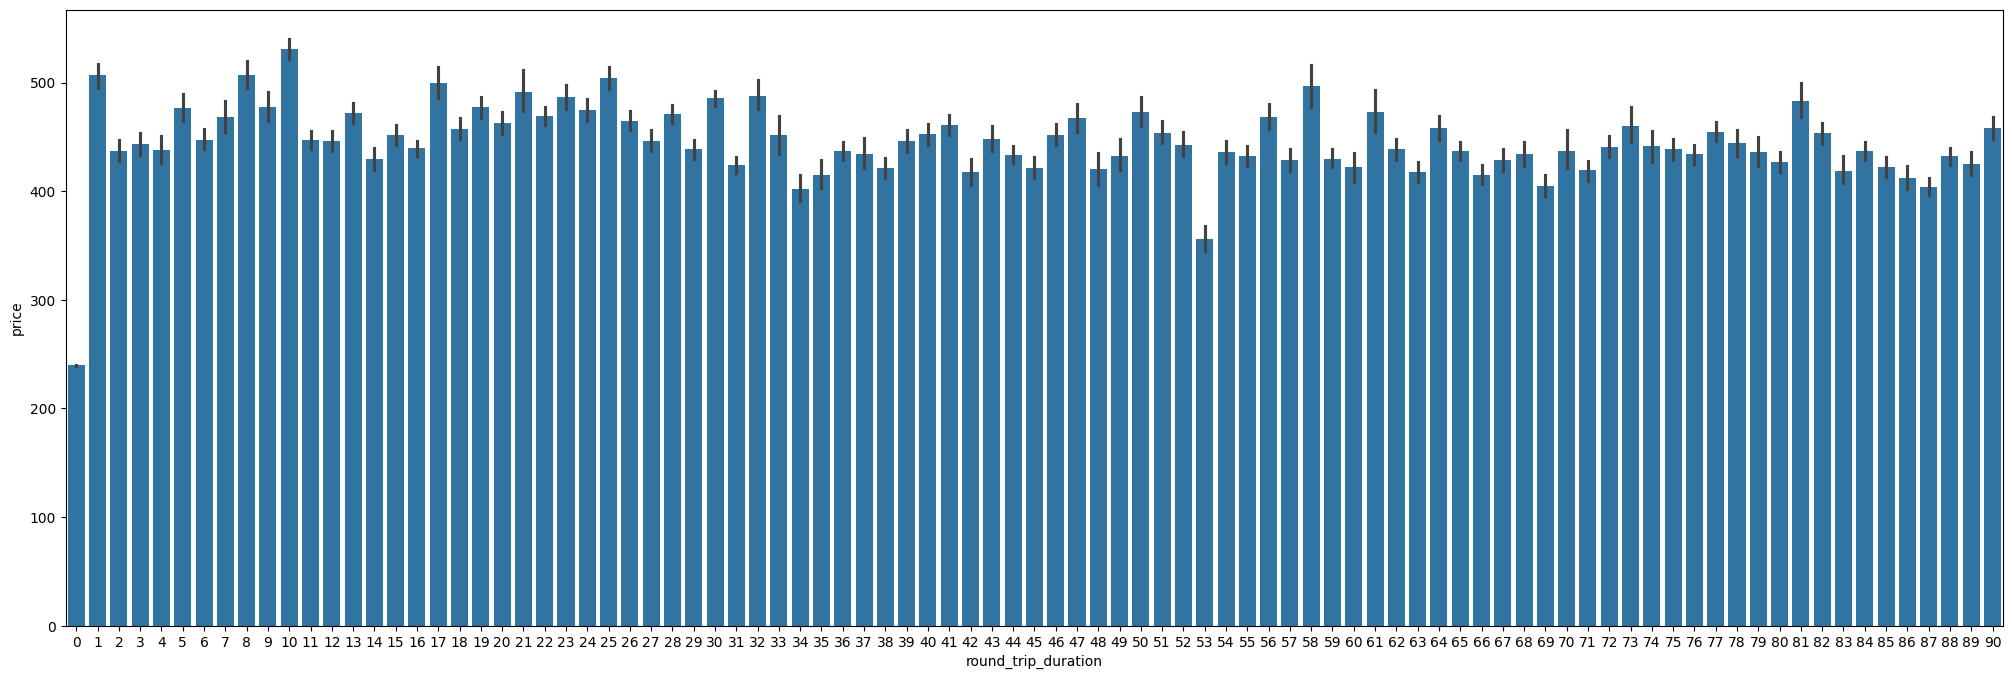

In [185]:
plt.figure(figsize=(25, 8))
sns.barplot(y = df['price'], x = df['round_trip_duration'])

### Observation
- There seems to be no clear trend for round trip duration, meaning if the day b/w inbound flight and outbound flight seems to have no impact on price. 
- However, later let's evaluate this in correlation matrix b/w price and round trip duration

## price vs Carbon emissions estimate num


In [186]:
df.columns

Index(['Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route',
       'City_Route', 'stop', 'price', 'overhead_bin', 'layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay'],
      dtype='object')

<Axes: xlabel='price', ylabel='Carbon emissions estimate num'>

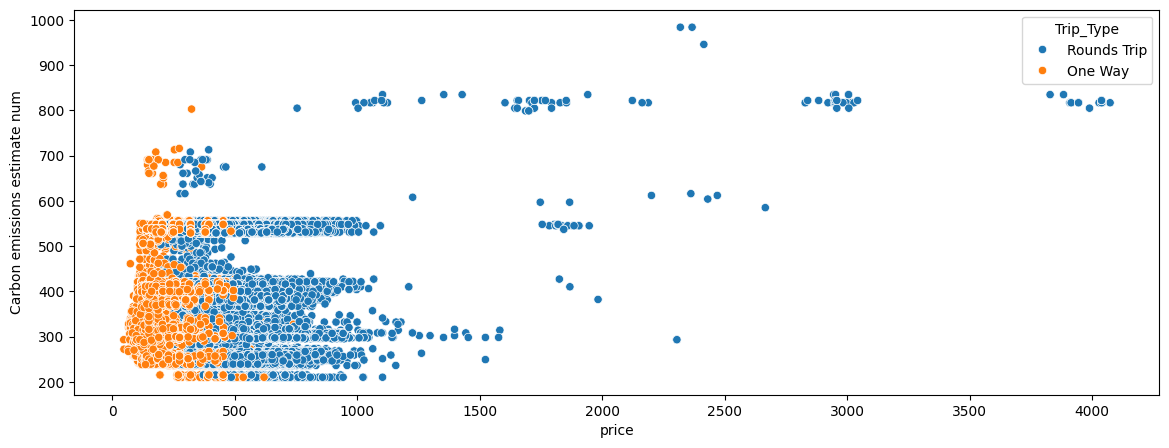

In [187]:
plt.figure(figsize=(14,5))
sns.scatterplot(x = df['price'], y = df['Carbon emissions estimate num'], hue=df['Trip_Type'])

### Observation
- Carbon emission is lower for one way
- There is more variation in carbon emission in round trip duration as compared to one way

## price vs carbon_emission% num


<Axes: xlabel='price', ylabel='carbon_emission% num'>

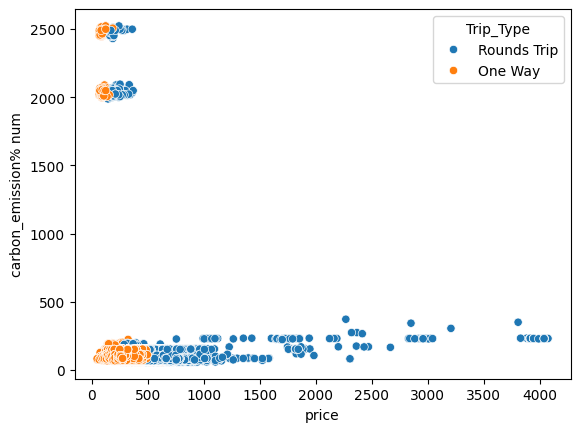

In [188]:
sns.scatterplot(x = df['price'], y = df['carbon_emission% num'], hue=df['Trip_Type'])

## price vs Days_to_Fly


C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\3262009297.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees


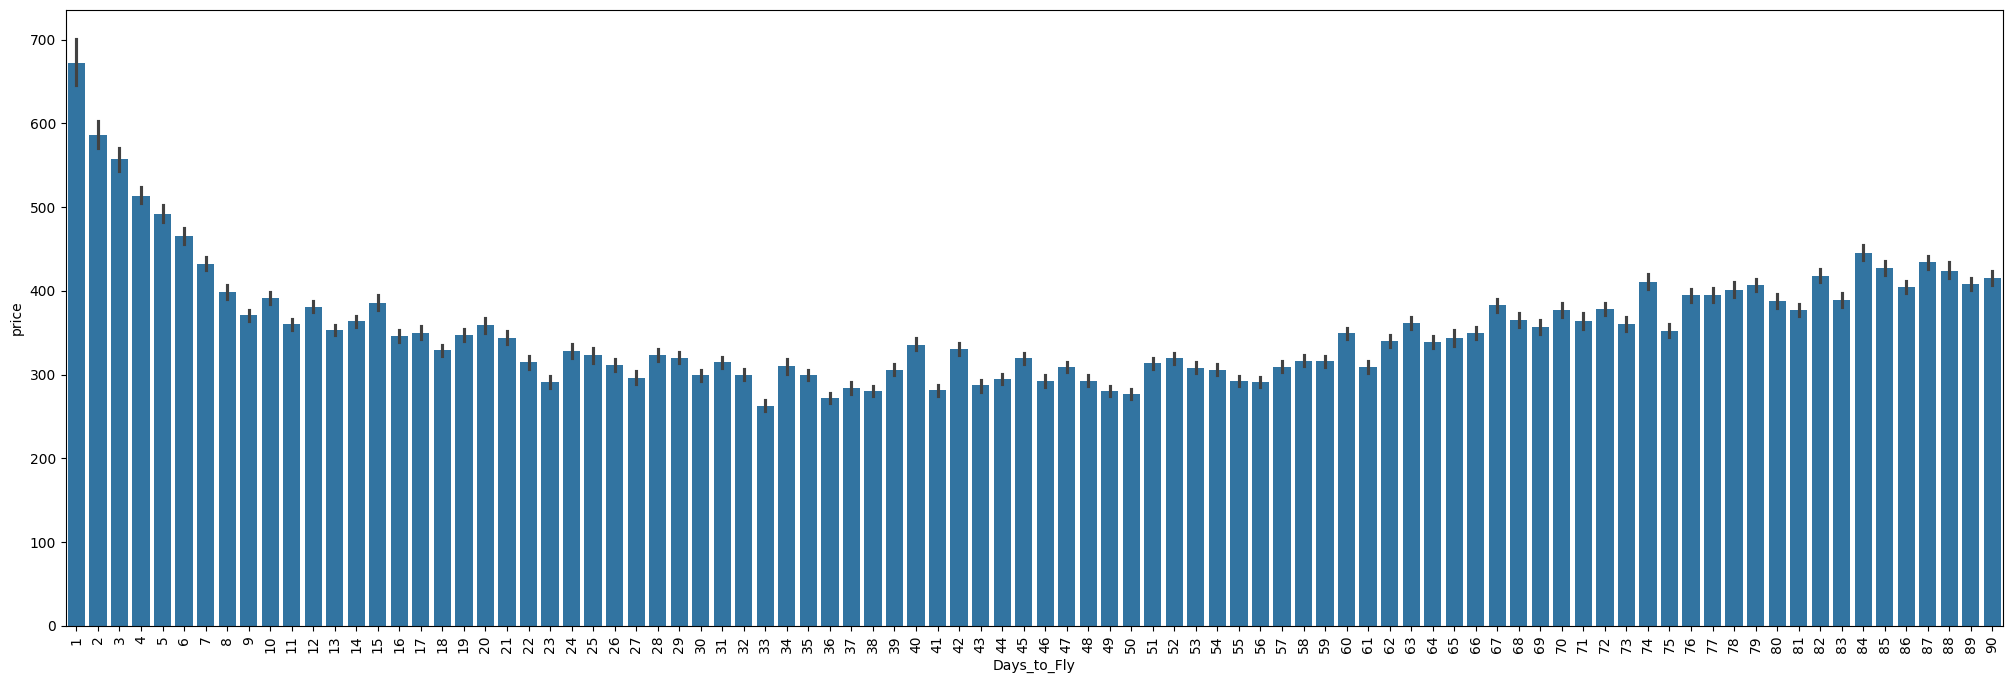

In [189]:
plt.figure(figsize=(25, 8))
ax = sns.barplot(x=df['Days_to_Fly'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

### Observation
- If we divide 90 days in 3 sections, 2nd section seems to have lower prices. 
- It can mean that booking a flight b/w 30 - 60 days has lower price as compared to 60 - 90 days 
- If flights are booked within a week a flying, the price are highest inversely proportional in order of days left to fly

### price vs days to fly vs trip type

C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1677095596.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


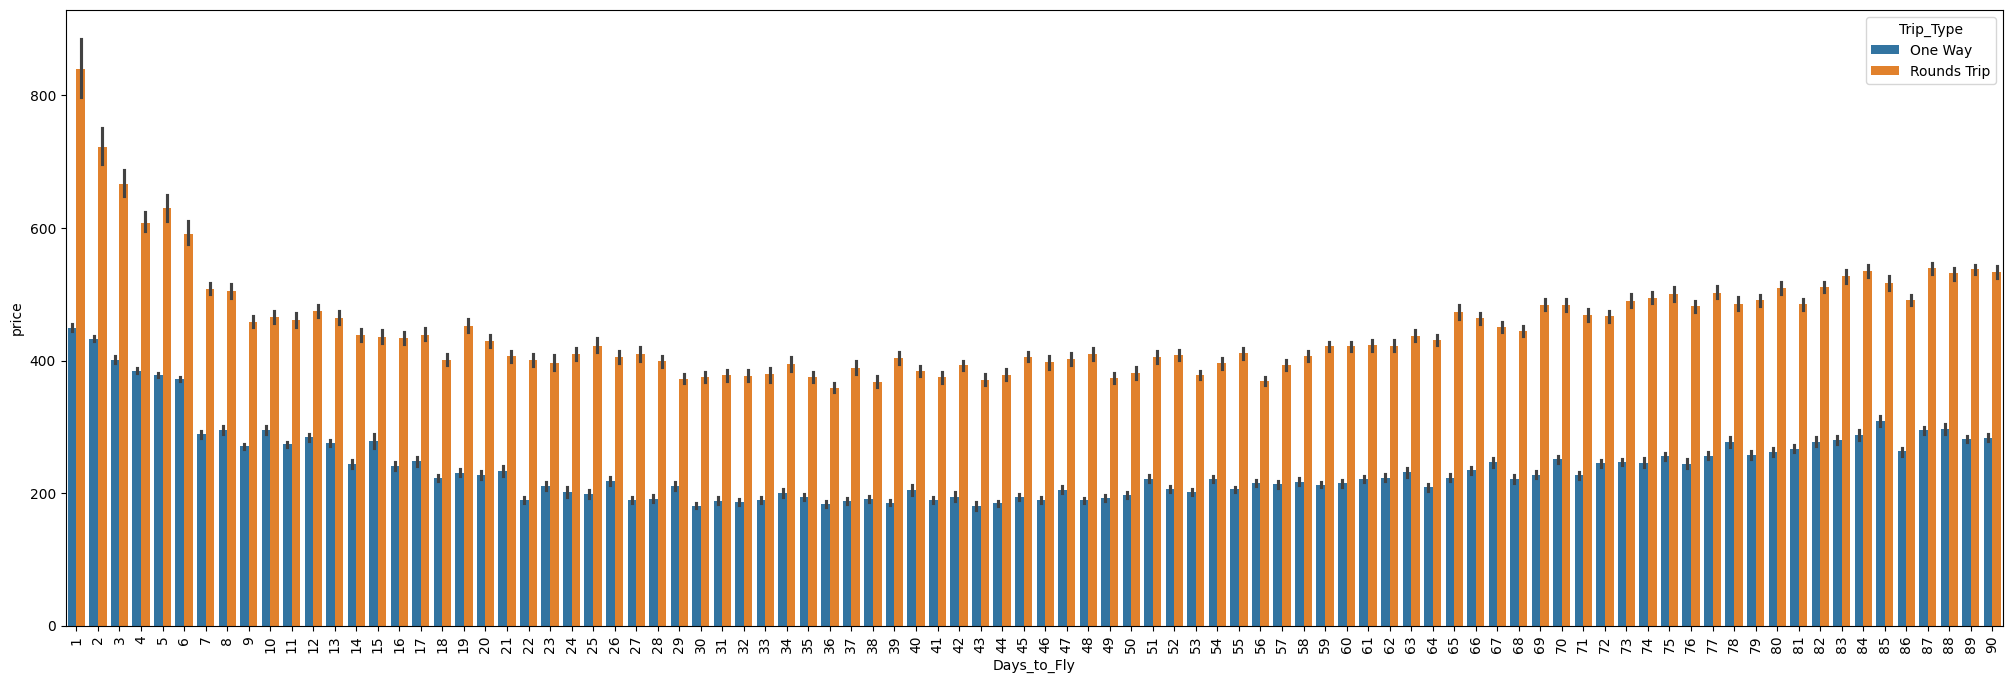

In [190]:
plt.figure(figsize=(25, 8))
ax = sns.barplot(x=df['Days_to_Fly'], y=df['price'], hue=df['Trip_Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<Axes: xlabel='Days_to_Fly', ylabel='price'>

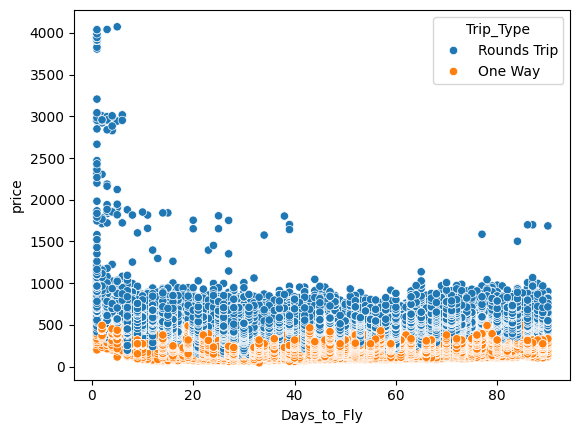

In [191]:
sns.scatterplot(x=df['Days_to_Fly'], y=df['price'], hue=df['Trip_Type'])

### price vs from_hour_segment


C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1881813062.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


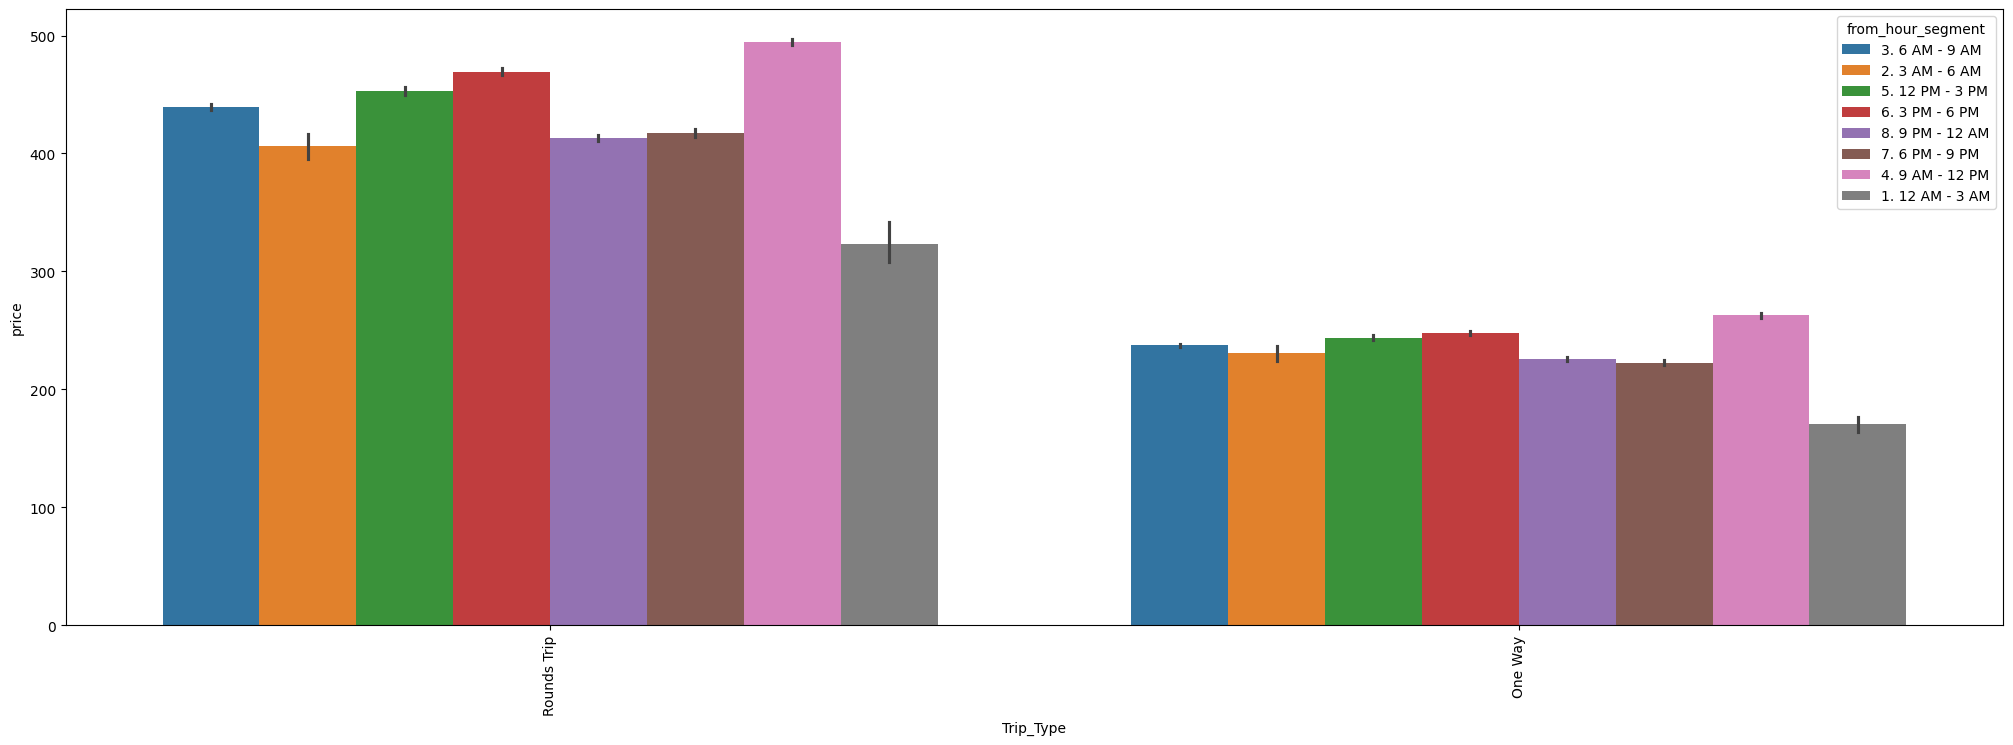

In [192]:
plt.figure(figsize=(25, 8))
ax = sns.barplot(x = df['Trip_Type'], y = df['price'], hue=df['from_hour_segment'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [193]:
df['from_hour_segment'].unique()

array(['3. 6 AM - 9 AM', '2. 3 AM - 6 AM', '5. 12 PM - 3 PM',
       '6. 3 PM - 6 PM', '8. 9 PM - 12 AM', '7. 6 PM - 9 PM',
       '4. 9 AM - 12 PM', '1. 12 AM - 3 AM'], dtype=object)

C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\4163959129.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


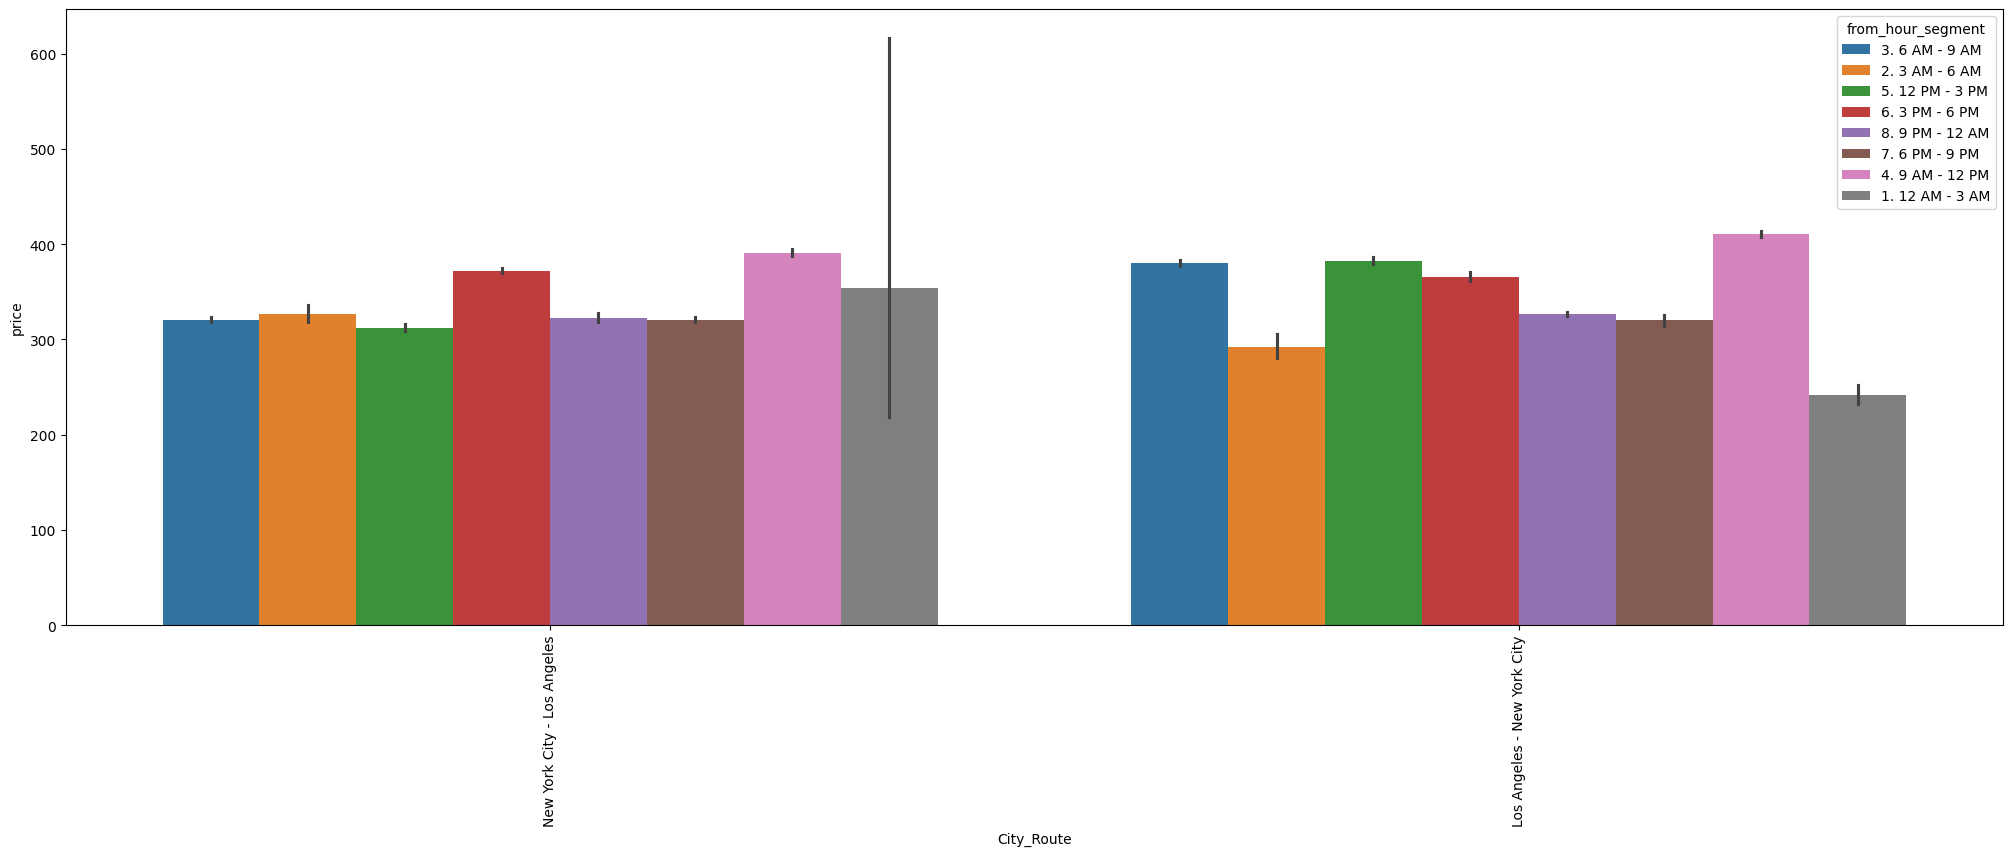

In [194]:
plt.figure(figsize=(25, 8))
ax = sns.barplot(x = df['City_Route'], y = df['price'], hue=df['from_hour_segment'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## price vs to_hour_segment


### price vs flight_duration_value

<Axes: xlabel='price', ylabel='flight_duration_value'>

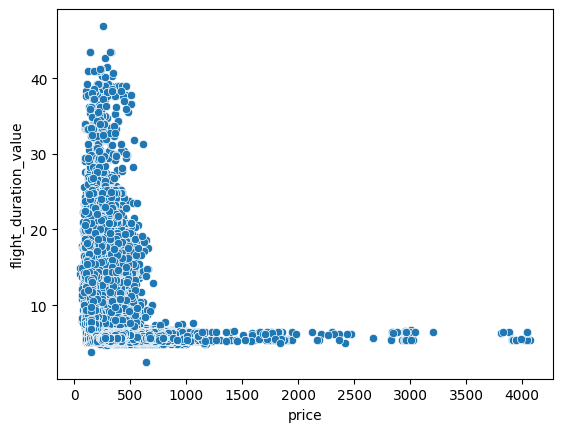

In [195]:
sns.scatterplot(x = df['price'],y = df['flight_duration_value'])

### Price vs flight duration value vs city route

<Axes: xlabel='price', ylabel='flight_duration_value'>

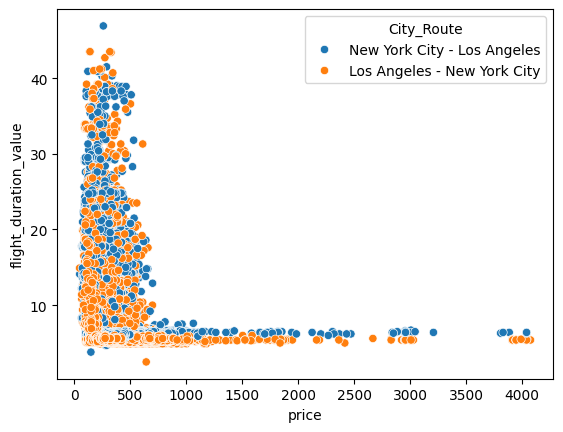

In [196]:
sns.scatterplot(x = df['price'],y = df['flight_duration_value'], hue=df['City_Route'])

#### Observation
- There is more variation in price of flight b/w 5-8 hours flight duration

### Price vs flight duration value vs trip type

<Axes: xlabel='price', ylabel='flight_duration_value'>

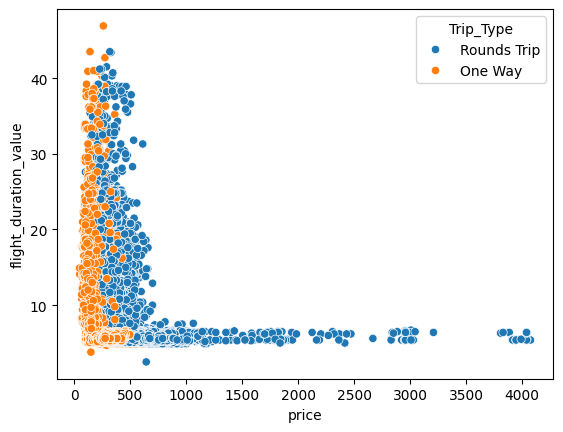

In [197]:
sns.scatterplot(x = df['price'],y = df['flight_duration_value'], hue=df['Trip_Type'])

#### Observation
- There is more variation in price of flight b/w 5-8 hours for round trip duration compared to one way.

<Axes: xlabel='price', ylabel='flight_duration_value'>

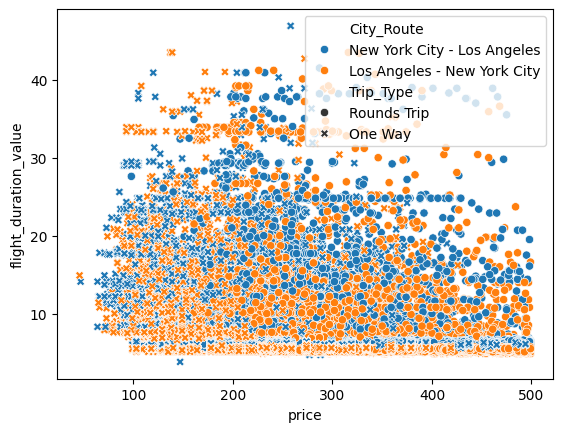

In [198]:
sns.scatterplot(x = df[df['price']<500]['price'],y = df['flight_duration_value'], hue=df['City_Route'], style=df['Trip_Type'])

## Price vs days to fly vs trip type

<Axes: xlabel='price', ylabel='Days_to_Fly'>

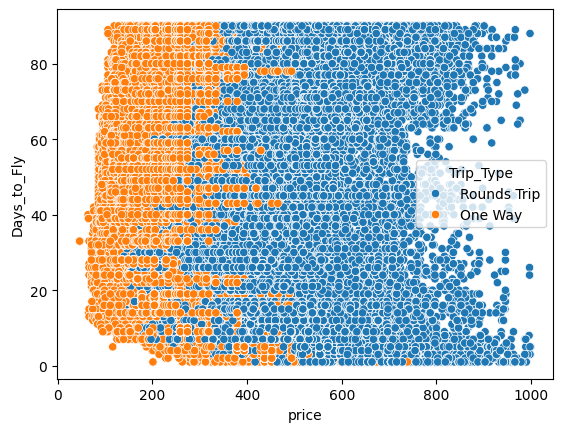

In [199]:
sns.scatterplot(x = df[df['price']<1000]['price'],y = df['Days_to_Fly'], hue=df['Trip_Type'])

In [200]:
df['Holiday'].unique()

array(['Not_Holiday', 'Holiday'], dtype=object)

<Axes: xlabel='Holiday', ylabel='price'>

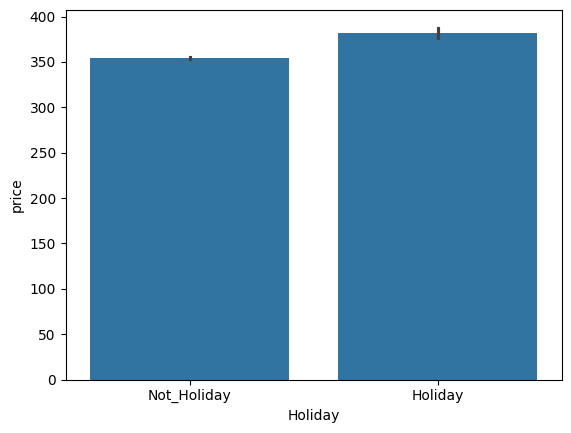

In [201]:
sns.barplot(x=df['Holiday'], y=df['price'])

#### Observation
- Price is more for flight booked during holidays

<Axes: xlabel='Fly_WeekDay', ylabel='price'>

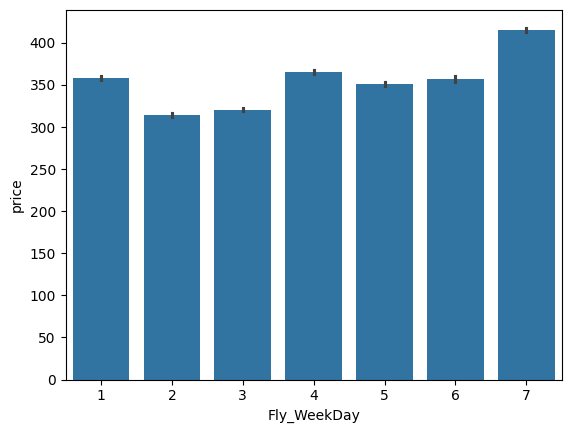

In [202]:
sns.barplot(x=df['Fly_WeekDay'], y=df['price'])

#### Observation
- Avg price seems to be higher for weekdays in following order (Sun, Mon, Sat, Thus, Fri, Web, Tues)

<Axes: xlabel='Fly_WeekDay', ylabel='price'>

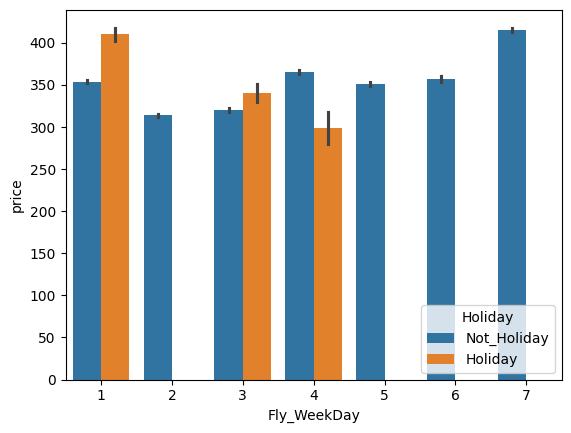

In [203]:
sns.barplot(x=df['Fly_WeekDay'], y=df['price'], hue=df['Holiday'])

# EDA - Pandas Profiling or Detail Library

In [204]:
# import dtale
# dtale.show(df)

In [205]:
df.columns

Index(['Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route',
       'City_Route', 'stop', 'price', 'overhead_bin', 'layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay'],
      dtype='object')

In [206]:
df = df[['Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route',
         'price', 'overhead_bin','layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value','Holiday','Fly_WeekDay']]

In [207]:
df['Report_Run_Time'] = pd.to_datetime(df['Report_Run_Time'])

In [212]:
profile = ProfileReport(df)
profile.to_file(raw_path + r'\reports\flight_df_profile_report.html')

Summarize dataset:  80%|████████  | 20/25 [00:02<00:00,  7.63it/s, Calculate auto correlation]                     c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 4 4 ... 4 4 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 62.99it/s]


In [213]:
df.head()

,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay
0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4
1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4
2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4
3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4
4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4


# Missing Value Imputation

In [214]:
df.isnull().sum()

Report_Run_Time                    0
carrier                            0
Trip_Type                          0
Airport_Route                      0
price                              0
overhead_bin                       0
layover_count                      0
round_trip_duration                0
Carbon emissions estimate num    693
carbon_emission% num              91
Days_to_Fly                        0
from_timestamp_1                   0
to_timestamp_1                     0
from_hour_segment                  0
to_hour_segment                    0
flight_duration_value              0
Holiday                            0
Fly_WeekDay                        0
dtype: int64

<Axes: xlabel='Carbon emissions estimate num', ylabel='carbon_emission% num'>

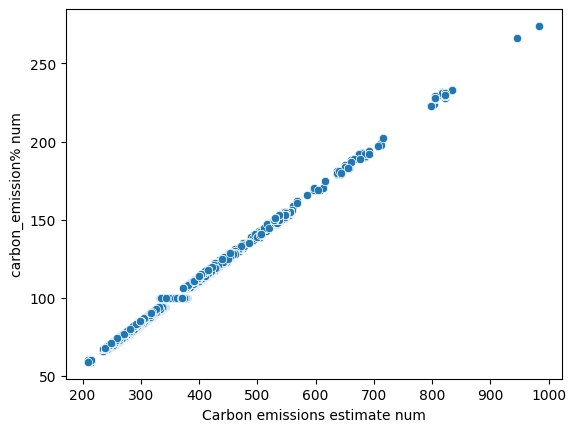

In [215]:
sns.scatterplot(x = df['Carbon emissions estimate num'], y=df['carbon_emission% num'])

In [216]:
train_carbon_df = df[~(df['Carbon emissions estimate num'].isnull()) & ~(df['carbon_emission% num'].isnull())][['Carbon emissions estimate num','carbon_emission% num']]
train_carbon_df

,Carbon emissions estimate num,carbon_emission% num
0,293,82
1,272,76
2,422,118
3,427,119
4,338,94
...,...,...
140474,300,85
140475,370,100
140476,298,85
140477,298,85


In [217]:
test_carbon_df = df[(df['Carbon emissions estimate num'].isnull()) & ~(df['carbon_emission% num'].isnull())][['Carbon emissions estimate num','carbon_emission% num']]
test_carbon_df = test_carbon_df.reset_index()
test_carbon_df

,index,Carbon emissions estimate num,carbon_emission% num
0,194,<NA>,2048
1,472,<NA>,2055
2,517,<NA>,2017
3,571,<NA>,2048
4,663,<NA>,2017
...,...,...,...
597,138747,<NA>,2048
598,138889,<NA>,2004
599,138893,<NA>,2009
600,138987,<NA>,2048


In [218]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_carbon_df[['carbon_emission% num']],train_carbon_df[['Carbon emissions estimate num']])

LinearRegression()

In [219]:
carbon_y_pred = model.predict(test_carbon_df[['carbon_emission% num']])
carbon_y_pred

array([[7304.43609921],
       [7329.40414127],
       [7193.86334151],
       [7304.43609921],
       [7193.86334151],
       [8741.88194921],
       [7318.70355181],
       [7193.86334151],
       [7193.86334151],
       [7193.86334151],
       [7329.40414127],
       [7304.43609921],
       [7215.26452042],
       [7193.86334151],
       [7304.43609921],
       [7318.70355181],
       [7193.86334151],
       [7193.86334151],
       [7215.26452042],
       [7193.86334151],
       [7318.70355181],
       [7304.43609921],
       [7329.40414127],
       [7193.86334151],
       [7304.43609921],
       [8895.25706472],
       [7193.86334151],
       [8741.88194921],
       [7193.86334151],
       [7147.49412055],
       [7304.43609921],
       [7193.86334151],
       [7193.86334151],
       [7215.26452042],
       [7329.40414127],
       [7193.86334151],
       [7147.49412055],
       [7193.86334151],
       [7211.69765727],
       [7304.43609921],
       [7318.70355181],
       [7329.404

In [220]:
carbon_y_pred = pd.DataFrame(carbon_y_pred, columns=['Carbon emissions estimate num pred'])
carbon_y_pred = round(carbon_y_pred)
carbon_y_pred

,Carbon emissions estimate num pred
0,7304.0
1,7329.0
2,7194.0
3,7304.0
4,7194.0
...,...
597,7304.0
598,7147.0
599,7165.0
600,7304.0


In [221]:
carbon_df = pd.concat([test_carbon_df,carbon_y_pred], axis=1)
carbon_df.columns

Index(['index', 'Carbon emissions estimate num', 'carbon_emission% num',
       'Carbon emissions estimate num pred'],
      dtype='object')

In [222]:
carbon_df = carbon_df[['index', 'carbon_emission% num',
       'Carbon emissions estimate num pred']]
carbon_df

,index,carbon_emission% num,Carbon emissions estimate num pred
0,194,2048,7304.0
1,472,2055,7329.0
2,517,2017,7194.0
3,571,2048,7304.0
4,663,2017,7194.0
...,...,...,...
597,138747,2048,7304.0
598,138889,2004,7147.0
599,138893,2009,7165.0
600,138987,2048,7304.0


In [223]:
df = df.reset_index()
df

,index,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay
0,0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4
1,1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4
2,2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4
3,3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4
4,4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140441,140474,2024-04-06,Alaska,One Way,LAX - EWR,259.0,No additional charge for overhead bin,0.0,0,300,85,89,2024-07-04 10:20:00,2024-07-05 18:59:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.6,Holiday,4
140442,140475,2024-04-06,JetBlue,One Way,LAX - EWR,259.0,Additional charge for overhead bin,0.0,0,370,100,89,2024-07-04 11:20:00,2024-07-05 19:49:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.5,Holiday,4
140443,140476,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 06:00:00,2024-07-05 14:35:00,3. 6 AM - 9 AM,5. 12 PM - 3 PM,5.6,Holiday,4
140444,140477,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 09:20:00,2024-07-05 18:15:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.9,Holiday,4


In [224]:
df = pd.merge(df, carbon_df[['index', 'Carbon emissions estimate num pred']], on= 'index', how='left')
df

,index,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,Carbon emissions estimate num pred
0,0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4,NaN
1,1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4,NaN
2,2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4,NaN
3,3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4,NaN
4,4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140441,140474,2024-04-06,Alaska,One Way,LAX - EWR,259.0,No additional charge for overhead bin,0.0,0,300,85,89,2024-07-04 10:20:00,2024-07-05 18:59:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.6,Holiday,4,NaN
140442,140475,2024-04-06,JetBlue,One Way,LAX - EWR,259.0,Additional charge for overhead bin,0.0,0,370,100,89,2024-07-04 11:20:00,2024-07-05 19:49:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.5,Holiday,4,NaN
140443,140476,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 06:00:00,2024-07-05 14:35:00,3. 6 AM - 9 AM,5. 12 PM - 3 PM,5.6,Holiday,4,NaN
140444,140477,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 09:20:00,2024-07-05 18:15:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.9,Holiday,4,NaN


In [225]:
df.loc[df['Carbon emissions estimate num'].isnull(), 'Carbon emissions estimate num'] = df['Carbon emissions estimate num pred']
df

,index,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,Carbon emissions estimate num pred
0,0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4,NaN
1,1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4,NaN
2,2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4,NaN
3,3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4,NaN
4,4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140441,140474,2024-04-06,Alaska,One Way,LAX - EWR,259.0,No additional charge for overhead bin,0.0,0,300,85,89,2024-07-04 10:20:00,2024-07-05 18:59:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.6,Holiday,4,NaN
140442,140475,2024-04-06,JetBlue,One Way,LAX - EWR,259.0,Additional charge for overhead bin,0.0,0,370,100,89,2024-07-04 11:20:00,2024-07-05 19:49:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.5,Holiday,4,NaN
140443,140476,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 06:00:00,2024-07-05 14:35:00,3. 6 AM - 9 AM,5. 12 PM - 3 PM,5.6,Holiday,4,NaN
140444,140477,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 09:20:00,2024-07-05 18:15:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.9,Holiday,4,NaN


In [226]:
df = df[~df['Carbon emissions estimate num'].isnull()]
df

,index,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,Carbon emissions estimate num pred
0,0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4,NaN
1,1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4,NaN
2,2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4,NaN
3,3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4,NaN
4,4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140441,140474,2024-04-06,Alaska,One Way,LAX - EWR,259.0,No additional charge for overhead bin,0.0,0,300,85,89,2024-07-04 10:20:00,2024-07-05 18:59:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.6,Holiday,4,NaN
140442,140475,2024-04-06,JetBlue,One Way,LAX - EWR,259.0,Additional charge for overhead bin,0.0,0,370,100,89,2024-07-04 11:20:00,2024-07-05 19:49:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.5,Holiday,4,NaN
140443,140476,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 06:00:00,2024-07-05 14:35:00,3. 6 AM - 9 AM,5. 12 PM - 3 PM,5.6,Holiday,4,NaN
140444,140477,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,298,85,89,2024-07-04 09:20:00,2024-07-05 18:15:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.9,Holiday,4,NaN


In [227]:
df.isnull().sum()


index                                      0
Report_Run_Time                            0
carrier                                    0
Trip_Type                                  0
Airport_Route                              0
price                                      0
overhead_bin                               0
layover_count                              0
round_trip_duration                        0
Carbon emissions estimate num              0
carbon_emission% num                       0
Days_to_Fly                                0
from_timestamp_1                           0
to_timestamp_1                             0
from_hour_segment                          0
to_hour_segment                            0
flight_duration_value                      0
Holiday                                    0
Fly_WeekDay                                0
Carbon emissions estimate num pred    139753
dtype: int64

In [228]:
df.columns

Index(['index', 'Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route',
       'price', 'overhead_bin', 'layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly',
       'from_timestamp_1', 'to_timestamp_1', 'from_hour_segment',
       'to_hour_segment', 'flight_duration_value', 'Holiday', 'Fly_WeekDay',
       'Carbon emissions estimate num pred'],
      dtype='object')

In [229]:
df = df[['index', 'Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route',
       'price', 'overhead_bin', 'layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly',
       'from_timestamp_1', 'to_timestamp_1', 'from_hour_segment',
       'to_hour_segment', 'flight_duration_value', 'Holiday', 'Fly_WeekDay']]

In [230]:
df.head()

,index,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay
0,0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4
1,1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4
2,2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4
3,3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4
4,4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4


# Outlier Treatement

In [231]:
# sns.boxplot(df.price)

In [232]:
# df.price.describe()

In [233]:
# # Calculate the IQR for the 'price' column
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# # Displaying the number of outliers and some statistics
# num_outliers = outliers.shape[0]
# outliers_price_stats = outliers['price'].describe()

# num_outliers, outliers_price_stats

In [234]:
# sns.displot(df['price'], bins=50)

In [235]:
# df.sort_values('price', ascending=False).head(10)

In [236]:
# df[df['price']>1000].sort_values('price', ascending=False)['price'].hist(bins=50)

In [237]:
# df[df['price']>1000].sort_values('price', ascending=False).shape

In [238]:
# df[df['price']>1000].sort_values('price', ascending=False).shape[0]/df.sort_values('price', ascending=False).shape[0]

In [239]:
# df = df[df['price']<=1000]

In [240]:
# df.columns

In [241]:
# df['carrier'].value_counts()

In [242]:
# df['overhead_bin'].value_counts()

In [243]:
# df.groupby(['carrier','overhead_bin']).count()[['Report_Run_Time']]

In [244]:
# df[['carrier','overhead_bin','price']].groupby(['carrier','overhead_bin']).mean()[['price']]

In [245]:
# sns.displot(df['flight_duration_value'],bins=50)


In [246]:
# df[df['flight_duration_value'] < 5].tail(20).sort_values('flight_duration_value')

In [247]:
# sns.boxplot(df['flight_duration_value'])

In [248]:
# df['flight_duration_value'].describe()

In [249]:
# # Calculate the IQR for the 'price' column
# Q1 = df['flight_duration_value'].quantile(0.25)
# Q3 = df['flight_duration_value'].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers
# outliers = df[(df['flight_duration_value'] < lower_bound) | (df['flight_duration_value'] > upper_bound)]

# # Displaying the number of outliers and some statistics
# num_outliers = outliers.shape[0]
# outliers_price_stats = outliers['flight_duration_value'].describe()

# num_outliers, outliers_price_stats

# Baseline Model

In [250]:
baseline_df = df

In [251]:
baseline_df.to_csv(r'baseline_df.csv')

## Columns to Encode

In [252]:
# baseline_df.head()

In [253]:
# columns_to_encode = ['carrier','Trip_Type','Airport_Route','overhead_bin','from_hour_segment','to_hour_segment', 'Holiday' ]

In [254]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# for columns in columns_to_encode:
#     baseline_df[columns] = label_encoder.fit_transform(baseline_df[columns])

# baseline_df

In [255]:
# X = baseline_df[['carrier', 'Trip_Type', 'Airport_Route'
#         , 'overhead_bin', 'layover_count', 'round_trip_duration',
#        'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly',
#      'from_hour_segment','to_hour_segment', 'flight_duration_value', 'Holiday', 'Fly_WeekDay']]

In [256]:
# Y = baseline_df['price']

In [257]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [258]:
# from sklearn.ensemble import RandomForestRegressor
# Random_Forest_regressor = RandomForestRegressor()
# Random_Forest_regressor.fit(X_train, y_train)

In [259]:
# y_train_pred = Random_Forest_regressor.predict(X_train)
# y_pred = Random_Forest_regressor.predict(X_test)

In [260]:
# y_test

In [261]:
# y_pred = pd.DataFrame(y_pred)
# y_pred

In [262]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_test,y_pred)

In [263]:
# from sklearn.metrics import r2_score

# # Assuming y_test and y_pred are your actual and predicted values respectively
# r2 = r2_score(y_test, y_pred)
# print("R2 Score:", round(r2,2))


In [264]:
# y_test_unscaled = y_scaler.inverse_transform(y_test)
# y_test_unscaled

In [265]:
# y_pred_unscaled = y_scaler.inverse_transform(y_pred)
# y_pred_unscaled

In [266]:
# y_test_unscaled_untransformed = np.exp(y_test_unscaled)
# y_test_unscaled_untransformed

In [267]:
# y_pred_unscaled_untransformed = np.exp(y_pred_unscaled)
# y_pred_unscaled_untransformed

# Log transformation - Price

In [268]:
df['price_transformed'] = np.log(df['price'])

# Encoding

In [269]:
df = df.reset_index()
df

,level_0,index,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,...,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,price_transformed
0,0,0,2024-03-10,Spirit,Rounds Trip,EWR - LAX,211.0,Additional charge for overhead bin,0.0,89,...,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.5,Not_Holiday,4,5.351858
1,1,1,2024-03-10,Alaska,Rounds Trip,EWR - LAX,297.0,No additional charge for overhead bin,0.0,89,...,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,3. 6 AM - 9 AM,4. 9 AM - 12 PM,6.3,Not_Holiday,4,5.693732
2,2,2,2024-03-10,JetBlue,Rounds Trip,EWR - LAX,298.0,Additional charge for overhead bin,0.0,89,...,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,2. 3 AM - 6 AM,3. 6 AM - 9 AM,6.2,Not_Holiday,4,5.697093
3,3,3,2024-03-10,United,Rounds Trip,EWR - LAX,302.0,Additional charge for overhead bin,0.0,89,...,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,5. 12 PM - 3 PM,6. 3 PM - 6 PM,6.4,Not_Holiday,4,5.710427
4,4,4,2024-03-10,Spirit,Rounds Trip,LGA - LAX,269.0,No additional charge for overhead bin,1.0,89,...,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,6. 3 PM - 6 PM,6. 3 PM - 6 PM,27.5,Not_Holiday,4,5.594711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140350,140441,140474,2024-04-06,Alaska,One Way,LAX - EWR,259.0,No additional charge for overhead bin,0.0,0,...,85,89,2024-07-04 10:20:00,2024-07-05 18:59:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.6,Holiday,4,5.556828
140351,140442,140475,2024-04-06,JetBlue,One Way,LAX - EWR,259.0,Additional charge for overhead bin,0.0,0,...,100,89,2024-07-04 11:20:00,2024-07-05 19:49:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.5,Holiday,4,5.556828
140352,140443,140476,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,...,85,89,2024-07-04 06:00:00,2024-07-05 14:35:00,3. 6 AM - 9 AM,5. 12 PM - 3 PM,5.6,Holiday,4,5.613128
140353,140444,140477,2024-04-06,Delta,One Way,LAX - JFK,274.0,No additional charge for overhead bin,0.0,0,...,85,89,2024-07-04 09:20:00,2024-07-05 18:15:00,4. 9 AM - 12 PM,7. 6 PM - 9 PM,5.9,Holiday,4,5.613128


## One Hot Encoding

In [270]:
df.columns

Index(['level_0', 'index', 'Report_Run_Time', 'carrier', 'Trip_Type',
       'Airport_Route', 'price', 'overhead_bin', 'layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price_transformed'],
      dtype='object')

In [271]:
df = df[['Report_Run_Time', 'carrier', 'Trip_Type',
       'Airport_Route', 'price', 'overhead_bin', 'layover_count',
       'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'from_timestamp_1',
       'to_timestamp_1', 'from_hour_segment', 'to_hour_segment',
       'flight_duration_value', 'Holiday', 'Fly_WeekDay', 'price_transformed']]

In [272]:
# # columns to encode 
# categorical_columns = ['carrier', 'Trip_Type', 'Airport_Route','overhead_bin', 'from_hour_segment', 'to_hour_segment','Holiday', 'Fly_WeekDay']

In [273]:
# from sklearn.preprocessing import OneHotEncoder

# # encoder = OneHotEncoder(sparse_output=False, drop='first')
# encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = encoder.fit_transform(df[categorical_columns])
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [274]:
# df.shape

In [275]:
# one_hot_df.shape

In [276]:
# one_hot_df.head()

In [277]:
# df_encoded = pd.concat([df, one_hot_df], axis=1)
# df_encoded = df_encoded.drop(categorical_columns, axis=1)


In [278]:
# df_encoded = df_encoded.drop(['Report_Run_Time','from_timestamp_1','to_timestamp_1','price'], axis=1)
# df_encoded.head(2)

In [279]:
# df_encoded.isnull().sum()

In [280]:
columns_to_encode = ['carrier','Trip_Type','Airport_Route','overhead_bin','from_hour_segment','to_hour_segment', 'Holiday' ]

In [281]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for columns in columns_to_encode:
    df[columns] = label_encoder.fit_transform(df[columns])

df

C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1666453587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = label_encoder.fit_transform(df[columns])
C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1666453587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = label_encoder.fit_transform(df[columns])
C:\Users\anshu\AppData\Local\Temp\ipykernel_2108\1666453587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,price_transformed
0,2024-03-10,5,1,0,211.0,0,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,2,3,6.5,1,4,5.351858
1,2024-03-10,0,1,0,297.0,1,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,2,3,6.3,1,4,5.693732
2,2024-03-10,4,1,0,298.0,0,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,1,2,6.2,1,4,5.697093
3,2024-03-10,8,1,0,302.0,0,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,4,5,6.4,1,4,5.710427
4,2024-03-10,5,1,5,269.0,1,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,5,5,27.5,1,4,5.594711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140350,2024-04-06,0,0,2,259.0,1,0.0,0,300,85,89,2024-07-04 10:20:00,2024-07-05 18:59:00,3,6,5.6,0,4,5.556828
140351,2024-04-06,4,0,2,259.0,0,0.0,0,370,100,89,2024-07-04 11:20:00,2024-07-05 19:49:00,3,6,5.5,0,4,5.556828
140352,2024-04-06,2,0,3,274.0,1,0.0,0,298,85,89,2024-07-04 06:00:00,2024-07-05 14:35:00,2,4,5.6,0,4,5.613128
140353,2024-04-06,2,0,3,274.0,1,0.0,0,298,85,89,2024-07-04 09:20:00,2024-07-05 18:15:00,3,6,5.9,0,4,5.613128


## Scaling

In [282]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [283]:
x_train_scaled = x_scaler.fit_transform(df[['layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly','flight_duration_value']])
y_train_scaled = y_scaler.fit_transform(df[['price_transformed']])

In [284]:
df_encoded = df.drop(columns=['layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly',
       'flight_duration_value', 'price_transformed'])

In [285]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=['layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly','flight_duration_value'])

In [286]:
df_encoded = pd.concat([x_train_scaled, df_encoded], axis=1)
df_encoded.columns

Index(['layover_count', 'round_trip_duration', 'Carbon emissions estimate num',
       'carbon_emission% num', 'Days_to_Fly', 'flight_duration_value',
       'Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route', 'price',
       'overhead_bin', 'from_timestamp_1', 'to_timestamp_1',
       'from_hour_segment', 'to_hour_segment', 'Holiday', 'Fly_WeekDay'],
      dtype='object')

In [287]:
df.columns

Index(['Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route', 'price',
       'overhead_bin', 'layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly',
       'from_timestamp_1', 'to_timestamp_1', 'from_hour_segment',
       'to_hour_segment', 'flight_duration_value', 'Holiday', 'Fly_WeekDay',
       'price_transformed'],
      dtype='object')

In [288]:
X = df_encoded[['layover_count', 'round_trip_duration', 'Carbon emissions estimate num',
       'Days_to_Fly', 'flight_duration_value', 'carrier', 'Trip_Type', 'Airport_Route',
       'overhead_bin','from_hour_segment', 'to_hour_segment', 'Holiday', 'Fly_WeekDay']]

In [289]:
Y = pd.DataFrame(y_train_scaled, columns=['price_transformed'])

In [290]:
df_encoded.head()

,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,flight_duration_value,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,Holiday,Fly_WeekDay
0,-0.375729,2.157888,-0.229402,-0.231539,-1.073723,-0.020936,2024-03-10,5,1,0,211.0,0,2024-03-28 06:47:00,2024-03-28 10:15:00,2,3,1,4
1,-0.375729,2.157888,-0.273393,-0.276373,-1.073723,-0.093242,2024-03-10,0,1,0,297.0,1,2024-03-28 07:30:00,2024-03-28 10:48:00,2,3,1,4
2,-0.375729,2.157888,0.040833,0.037461,-1.073723,-0.129395,2024-03-10,4,1,0,298.0,0,2024-03-28 05:15:00,2024-03-28 08:30:00,1,2,1,4
3,-0.375729,2.157888,0.051307,0.044933,-1.073723,-0.057089,2024-03-10,8,1,0,302.0,0,2024-03-28 12:00:00,2024-03-28 15:24:00,4,5,1,4
4,2.118733,2.157888,-0.135134,-0.141873,-1.073723,7.571218,2024-03-10,5,1,5,269.0,1,2024-03-28 16:29:00,2024-03-28 17:00:00,5,5,1,4


# Feature Selection

In [291]:
Y.shape

(140355, 1)

In [292]:
df_encoded = pd.concat([df_encoded[['layover_count', 'round_trip_duration', 'Carbon emissions estimate num',
       'Days_to_Fly', 'flight_duration_value', 'carrier', 'Trip_Type', 'Airport_Route',
       'overhead_bin','from_hour_segment', 'to_hour_segment', 'Holiday', 'Fly_WeekDay']], Y], axis=1)
df_encoded

,layover_count,round_trip_duration,Carbon emissions estimate num,Days_to_Fly,flight_duration_value,carrier,Trip_Type,Airport_Route,overhead_bin,from_hour_segment,to_hour_segment,Holiday,Fly_WeekDay,price_transformed
0,-0.375729,2.157888,-0.229402,-1.073723,-0.020936,5,1,0,0,2,3,1,4,-0.848032
1,-0.375729,2.157888,-0.273393,-1.073723,-0.093242,0,1,0,1,2,3,1,4,-0.137678
2,-0.375729,2.157888,0.040833,-1.073723,-0.129395,4,1,0,0,1,2,1,4,-0.130693
3,-0.375729,2.157888,0.051307,-1.073723,-0.057089,8,1,0,0,4,5,1,4,-0.102989
4,2.118733,2.157888,-0.135134,-1.073723,7.571218,5,1,5,1,5,5,1,4,-0.343425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140350,-0.375729,-0.838887,-0.214738,1.699165,-0.346314,0,0,2,1,3,6,0,4,-0.422140
140351,-0.375729,-0.838887,-0.068099,1.699165,-0.382467,4,0,2,0,3,6,0,4,-0.422140
140352,-0.375729,-0.838887,-0.218928,1.699165,-0.346314,2,0,3,1,2,4,0,4,-0.305159
140353,-0.375729,-0.838887,-0.218928,1.699165,-0.237855,2,0,3,1,3,6,0,4,-0.305159


## Technique 1 - Correlation Analysis

,feature,price_transformed
6,Trip_Type,0.663966
1,round_trip_duration,0.476478
8,overhead_bin,0.253030
12,Fly_WeekDay,0.119281
10,to_hour_segment,0.057613
3,Days_to_Fly,-0.005910
11,Holiday,-0.029984
7,Airport_Route,-0.057211
9,from_hour_segment,-0.070942
2,Carbon emissions estimate num,-0.073226


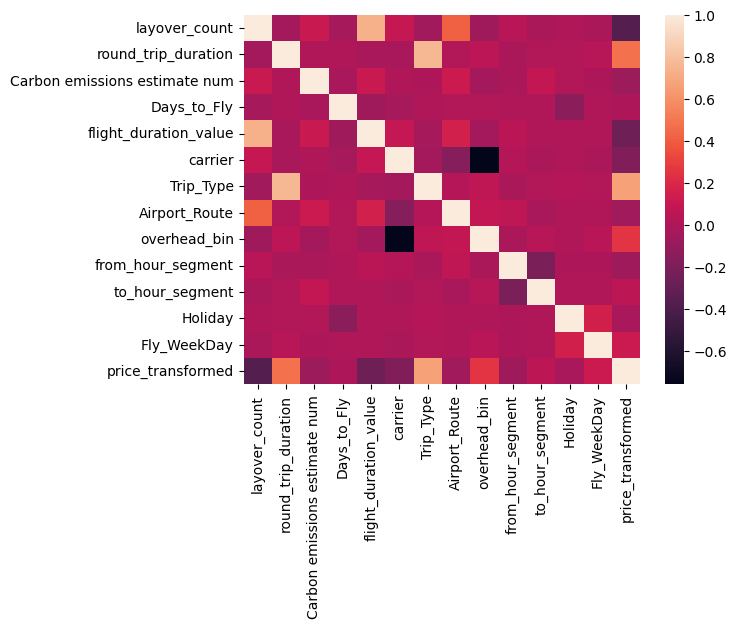

In [293]:
sns.heatmap(df_encoded.corr())
fi_df1 = df_encoded.corr()['price_transformed'].iloc[:-1].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1 = fi_df1.sort_values('price_transformed', ascending=False)
fi_df1

## Technique 2 - Random Forest Feature Importance

In [294]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X, Y)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,feature,rf_importance
6,Trip_Type,0.240530
1,round_trip_duration,0.234379
3,Days_to_Fly,0.176984
0,layover_count,0.127079
12,Fly_WeekDay,0.057023
2,Carbon emissions estimate num,0.037097
8,overhead_bin,0.027031
4,flight_duration_value,0.026255
5,carrier,0.022789
10,to_hour_segment,0.017564


## Technique 3 - Gradient Boosting Feature Importance 

In [295]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X, Y)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,feature,gb_importance
1,round_trip_duration,0.368862
6,Trip_Type,0.168811
3,Days_to_Fly,0.158143
0,layover_count,0.122340
12,Fly_WeekDay,0.042437
8,overhead_bin,0.033961
5,carrier,0.027089
4,flight_duration_value,0.025962
7,Airport_Route,0.020245
2,Carbon emissions estimate num,0.015899


## Technique 4 - Permutation Importance

In [296]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=15, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,feature,permutation_importance
3,Days_to_Fly,0.350680
6,Trip_Type,0.267518
1,round_trip_duration,0.172134
12,Fly_WeekDay,0.161673
0,layover_count,0.141148
8,overhead_bin,0.108081
2,Carbon emissions estimate num,0.060832
5,carrier,0.056875
4,flight_duration_value,0.049408
7,Airport_Route,0.046996


## Technique 5 - LASSO

In [297]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, Y)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,Trip_Type,1.247087
8,overhead_bin,0.310890
12,Fly_WeekDay,0.047165
7,Airport_Route,0.041221
10,to_hour_segment,0.014033
4,flight_duration_value,-0.000000
5,carrier,0.000000
11,Holiday,-0.000000
3,Days_to_Fly,-0.012667
1,round_trip_duration,-0.013852


## Technique 6 - RFE

In [298]:
# from sklearn.feature_selection import RFE

# # Initialize the base estimator
# estimator = RandomForestRegressor()

# # Apply RFE on the label-encoded and standardized training data
# selector_label = RFE(estimator, n_features_to_select=X.shape[1], step=1)
# selector_label = selector_label.fit(X, Y)

# # Get the selected features based on RFE
# selected_features = X.columns[selector_label.support_]

# # Extract the coefficients for the selected features from the underlying linear regression model
# selected_coefficients = selector_label.estimator_.feature_importances_

# # Organize the results into a DataFrame
# fi_df6 = pd.DataFrame({
#     'feature': selected_features,
#     'rfe_score': selected_coefficients
# }).sort_values(by='rfe_score', ascending=False)

# fi_df6

## Technique 7 - Linear Regression Weights

In [299]:
# # Train a linear regression model on the label-encoded and standardized training data
# lin_reg = LinearRegression()
# lin_reg.fit(X, Y)

# # Extract coefficients
# fi_df7 = pd.DataFrame({
#     'feature': X.columns,
#     'reg_coeffs': lin_reg.coef_[0]
# }).sort_values(by='reg_coeffs', ascending=False)

# fi_df7

## Technique 8 - SHAP

In [300]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X, Y)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values

In [301]:
# fi_df8 = pd.DataFrame({
#     'feature': X.columns,
#     'SHAP_score': np.abs(shap_values).mean(axis=0)
# }).sort_values(by='SHAP_score', ascending=False)

# fi_df8

In [302]:
# final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')
# final_fi_df

In [303]:
# # normalize the score
# final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [304]:
# final_fi_df

In [305]:
# # final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)
# final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

In [306]:
# from sklearn.model_selection import KFold, cross_val_score
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(Random_Forest_regressor, X, Y, cv=kfold, scoring='r2')
# scores

# Model Selection

In [307]:
df.columns

Index(['Report_Run_Time', 'carrier', 'Trip_Type', 'Airport_Route', 'price',
       'overhead_bin', 'layover_count', 'round_trip_duration',
       'Carbon emissions estimate num', 'carbon_emission% num', 'Days_to_Fly',
       'from_timestamp_1', 'to_timestamp_1', 'from_hour_segment',
       'to_hour_segment', 'flight_duration_value', 'Holiday', 'Fly_WeekDay',
       'price_transformed'],
      dtype='object')

In [308]:
df.head()

,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,price_transformed
0,2024-03-10,5,1,0,211.0,0,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,2,3,6.5,1,4,5.351858
1,2024-03-10,0,1,0,297.0,1,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,2,3,6.3,1,4,5.693732
2,2024-03-10,4,1,0,298.0,0,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,1,2,6.2,1,4,5.697093
3,2024-03-10,8,1,0,302.0,0,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,4,5,6.4,1,4,5.710427
4,2024-03-10,5,1,5,269.0,1,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,5,5,27.5,1,4,5.594711


In [309]:
columns_to_encode = ['carrier','Trip_Type','Airport_Route','overhead_bin','from_hour_segment','to_hour_segment', 'Holiday' ]

In [310]:
from sklearn.compose import ColumnTransformer
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['round_trip_duration', 'Carbon emissions estimate num', 'Days_to_Fly', 'flight_duration_value']),
        # ('cat', OrdinalEncoder(), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [311]:
from sklearn.pipeline import Pipeline
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [312]:
from sklearn.model_selection import KFold, cross_val_score
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')

In [313]:
scores.mean(),scores.std()

(0.6107582183259377, 0.004072033093956991)

In [314]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [315]:
pipeline.fit(X_train,y_train)

c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['round_trip_duration',
                                                   'Carbon emissions estimate '
                                                   'num',
                                                   'Days_to_Fly',
                                                   'flight_duration_value'])])),
                ('regressor', LinearRegression())])

In [316]:
y_pred = pipeline.predict(X_test)

In [317]:
y_pred = np.expm1(y_pred)

In [318]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.7269265265941945

In [319]:
def scorer(model_name, model):    
    output = []
    output.append(model_name)
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
    ])
    # K-fold cross-validation
    kfold = KFold(n_splits=2, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')
    output.append(scores.mean())
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    y_pred = np.expm1(y_pred)
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    return output

In [322]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [323]:
model_dict = {
    'linear_reg':LinearRegression(),
    # 'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [324]:
model_output = []
for model_name,model in model_dict.items():
    print(model_name)
    model_output.append(scorer(model_name, model))

linear_reg
ridge
LASSO
decision tree
random forest


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


extra trees


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


gradient boosting


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


adaboost


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mlp


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


xgboost


In [325]:
model_output

[['linear_reg', 0.6107458075469985, 0.7269265265941945],
 ['ridge', 0.6107458215000552, 0.7269271535743478],
 ['LASSO', -1.535699079036057e-05, 1.066247989281974],
 ['decision tree', 0.8013452785581467, 0.43214611484479787],
 ['random forest', 0.884268004524352, 0.35394590037567236],
 ['extra trees', 0.8731585659483974, 0.3534882360842163],
 ['gradient boosting', 0.8196979819364416, 0.5210987167232355],
 ['adaboost', 0.689706089347704, 0.706434908132771],
 ['mlp', 0.8263420348263486, 0.5261508667165783],
 ['xgboost', 0.8773937821388245, 0.41894846207306785]]

In [326]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [327]:
model_df.sort_values(['mae'])

,name,r2,mae
5,extra trees,0.873159,0.353488
4,random forest,0.884268,0.353946
9,xgboost,0.877394,0.418948
3,decision tree,0.801345,0.432146
6,gradient boosting,0.819698,0.521099
8,mlp,0.826342,0.526151
7,adaboost,0.689706,0.706435
0,linear_reg,0.610746,0.726927
1,ridge,0.610746,0.726927
2,LASSO,-0.000015,1.066248


## OneHotEncoding

In [328]:
columns_to_encode = ['carrier','Trip_Type','Airport_Route','overhead_bin','from_hour_segment','to_hour_segment', 'Holiday' ]

In [329]:
df.head()

,Report_Run_Time,carrier,Trip_Type,Airport_Route,price,overhead_bin,layover_count,round_trip_duration,Carbon emissions estimate num,carbon_emission% num,Days_to_Fly,from_timestamp_1,to_timestamp_1,from_hour_segment,to_hour_segment,flight_duration_value,Holiday,Fly_WeekDay,price_transformed
0,2024-03-10,5,1,0,211.0,0,0.0,89,293,82,18,2024-03-28 06:47:00,2024-03-28 10:15:00,2,3,6.5,1,4,5.351858
1,2024-03-10,0,1,0,297.0,1,0.0,89,272,76,18,2024-03-28 07:30:00,2024-03-28 10:48:00,2,3,6.3,1,4,5.693732
2,2024-03-10,4,1,0,298.0,0,0.0,89,422,118,18,2024-03-28 05:15:00,2024-03-28 08:30:00,1,2,6.2,1,4,5.697093
3,2024-03-10,8,1,0,302.0,0,0.0,89,427,119,18,2024-03-28 12:00:00,2024-03-28 15:24:00,4,5,6.4,1,4,5.710427
4,2024-03-10,5,1,5,269.0,1,1.0,89,338,94,18,2024-03-28 16:29:00,2024-03-28 17:00:00,5,5,27.5,1,4,5.594711


In [330]:
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['round_trip_duration', 'Carbon emissions estimate num', 'Days_to_Fly', 'flight_duration_value']),
        # ('cat', OrdinalEncoder(), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first'),columns_to_encode)
    ], 
    remainder='passthrough'
)

In [331]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [332]:
# K-fold cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')

In [333]:
scores.mean(),scores.std()

(0.659300662575506, 5.046192500451907e-05)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [335]:
pipeline.fit(X_train,y_train)

c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['round_trip_duration',
                                                   'Carbon emissions estimate '
                                                   'num',
                                                   'Days_to_Fly',
                                                   'flight_duration_value']),
                                                 ('cat1',
                                                  OneHotEncoder(drop='first'),
                                                  ['carrier', 'Trip_Type',
                                                   'Airport_Route',
                                                   'overhead_bin',
                                                   'from_hour_segment',
                                                   'to_hour_segment',
                                                   'Holiday'])])),
                ('regressor', LinearRegression())])

In [336]:
y_pred = pipeline.predict(X_test)

In [337]:
y_pred = np.expm1(y_pred)

In [338]:
mean_absolute_error(np.expm1(y_test),y_pred)

0.698668638719549

In [339]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=2, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, Y, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output

In [340]:
model_dict = {
    'linear_reg':LinearRegression(),
    # 'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [341]:
model_output = []
for model_name,model in model_dict.items():
    print(model_name)
    model_output.append(scorer(model_name, model))

linear_reg
ridge
LASSO
decision tree
random forest


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


extra trees


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


gradient boosting


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


adaboost


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mlp


c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\anshu\Desktop\MLOps\venv-mlops\mlops-venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


xgboost


In [342]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [343]:
model_df.sort_values(['mae'])

,name,r2,mae
4,random forest,0.884174,0.358399
5,extra trees,0.868524,0.364106
9,xgboost,0.877376,0.423726
3,decision tree,0.798090,0.450432
8,mlp,0.832635,0.509002
6,gradient boosting,0.818923,0.523350
0,linear_reg,0.659301,0.698669
1,ridge,0.659301,0.698686
7,adaboost,0.676074,0.718609
2,LASSO,-0.000015,1.066248


## OneHotEncoding With PCA

In [344]:
# # Creating a column transformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
#         ('cat', OrdinalEncoder(), columns_to_encode),
#         ('cat1',OneHotEncoder(drop='first',sparse_output=False),['sector','agePossession'])
#     ], 
#     remainder='passthrough'
# )

In [345]:
# # Creating a pipeline
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('pca', PCA(n_components=0.95)),
#     ('regressor', LinearRegression())
# ])

In [346]:
# # K-fold cross-validation
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [347]:
# scores.mean() 

In [348]:
# scores.std()

In [349]:
# def scorer(model_name, model):
    
#     output = []
    
#     output.append(model_name)
    
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('pca', PCA(n_components=0.95)),
#         ('regressor', model)
#     ])
    
#     # K-fold cross-validation
#     kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#     scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
#     output.append(scores.mean())
    
#     X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
#     pipeline.fit(X_train,y_train)
    
#     y_pred = pipeline.predict(X_test)
    
#     y_pred = np.expm1(y_pred)
    
#     output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
#     return output

In [350]:
# model_dict = {
#     'linear_reg':LinearRegression(),
#     'svr':SVR(),
#     'ridge':Ridge(),
#     'LASSO':Lasso(),
#     'decision tree': DecisionTreeRegressor(),
#     'random forest':RandomForestRegressor(),
#     'extra trees': ExtraTreesRegressor(),
#     'gradient boosting': GradientBoostingRegressor(),
#     'adaboost': AdaBoostRegressor(),
#     'mlp': MLPRegressor(),
#     'xgboost':XGBRegressor()
# }

In [351]:
# model_output = []
# for model_name,model in model_dict.items():
#     model_output.append(scorer(model_name, model))

In [352]:
# model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [353]:
# model_df.sort_values(['mae'])

## Taget Encode

In [354]:
# import category_encoders as ce

# columns_to_encode = ['property_type','sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

# # Creating a column transformer for preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), ['bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
#         ('cat', OrdinalEncoder(), columns_to_encode),
#         ('cat1',OneHotEncoder(drop='first',sparse_output=False),['agePossession']),
#         ('target_enc', ce.TargetEncoder(), ['sector'])
#     ], 
#     remainder='passthrough'
)

SyntaxError: unmatched ')' (1831832791.py, line 14)

In [ ]:
# !pip install category_encoders

In [ ]:
# # Creating a pipeline
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

In [ ]:
# # K-fold cross-validation
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [ ]:
# scores.mean(),scores.std()

In [ ]:
# def scorer(model_name, model):
    
#     output = []
    
#     output.append(model_name)
    
#     pipeline = Pipeline([
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])
    
#     # K-fold cross-validation
#     kfold = KFold(n_splits=10, shuffle=True, random_state=42)
#     scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
#     output.append(scores.mean())
    
#     X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
#     pipeline.fit(X_train,y_train)
    
#     y_pred = pipeline.predict(X_test)
    
#     y_pred = np.expm1(y_pred)
    
#     output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
#     return output
    

In [ ]:
# model_dict = {
#     'linear_reg':LinearRegression(),
#     'svr':SVR(),
#     'ridge':Ridge(),
#     'LASSO':Lasso(),
#     'decision tree': DecisionTreeRegressor(),
#     'random forest':RandomForestRegressor(),
#     'extra trees': ExtraTreesRegressor(),
#     'gradient boosting': GradientBoostingRegressor(),
#     'adaboost': AdaBoostRegressor(),
#     'mlp': MLPRegressor(),
#     'xgboost':XGBRegressor()
# }

In [ ]:
# model_output = []
# for model_name,model in model_dict.items():
#     model_output.append(scorer(model_name, model))

In [ ]:
# model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])

In [ ]:
# model_df.sort_values(['mae'])

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__max_depth': [None, 30],
    'regressor__max_samples':[0.1, 0.5, 1.0],
    'regressor__max_features': ['log2', 'sqrt', None]
}

In [ ]:
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['round_trip_duration', 'Carbon emissions estimate num', 'Days_to_Fly', 'flight_duration_value']),
        # ('cat', OrdinalEncoder(), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first'),columns_to_encode)
    ], 
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)

In [ ]:
search.fit(X, Y)

In [ ]:
final_pipe = search.best_estimator_

In [ ]:
search.best_params_

In [ ]:
search.best_score_

In [ ]:
final_pipe.fit(X,Y)

In [ ]:
X.head()

In [ ]:
y_pred = final_pipe.predict(X_test)

# Analytics Moule

Price Prediction Modeule